In [1]:
import keras
import urllib.request, json 
with urllib.request.urlopen("http://statistik.easycredit-bbl.de/XML/exchange/540/Schedule.php?type=json&saison=2017&fixedGamesOnly=0") as url:
    games = json.loads(url.read().decode())

    
    
arenakap = {486:6594,413:14500,433:4200,420:6150,415:6000,425:3300,430:6000,426:5002,540:3140,418:6200,421:4003,422:3603,483:3076,477:3447,428:3000,439:4200,517:3533,432:3132}

dataset=[]

for i in range(0,len(games['competition'][0]['spiel'])):
    datasetrow=[]     
    datasetrow.append(games['competition'][0]['spiel'][i]['home_id'])
    datasetrow.append(games['competition'][0]['spiel'][i]['gast_id'])
    datasetrow.append(int(games['competition'][0]['spiel'][i]['home_result']>games['competition'][0]['spiel'][i]['gast_result']))
    datasetrow.append(int(games['competition'][0]['spiel'][i]['zuschauer']))
    datasetrow.append(arenakap[int(games['competition'][0]['spiel'][i]['home_id'])])
    
    dataset.append(datasetrow)


# Umwandlung des Datasets in ein Numpy Array 
import numpy as np
# : bedeutet in diesem Fall auslesen aller zeilen
dataset=np.asarray(dataset)

from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
transformed_home_ids = encoder.fit_transform(dataset[:,0])


#ohne fit, damit die Teams eindeutig bleiben, nur transformation notwendig
transformed_gast_ids = encoder.transform(dataset[:,1])

# Umformung der Zuschauer in eine Spalte (vorher war es nur eine Zeile)
#print(np.reshape(dataset[:,3],(306,1)))

# Featurescaling der Zuschaueranzahl & Hallenkapazitäten
from sklearn.preprocessing import MinMaxScaler

arenaKap_scaler=MinMaxScaler()
arenaKap_scaler.fit([[0],[14500]]) #Maximum Berlin und 0 Minimum
#reshaping
transformed_zuschauer=arenaKap_scaler.transform(np.reshape(dataset[:,3],(306,1)))
transformed_kap=arenaKap_scaler.transform(np.reshape(dataset[:,4],(306,1)))


data=np.c_[transformed_home_ids,transformed_gast_ids,transformed_zuschauer,transformed_kap,dataset[:,2]]

# Importing the Keras libraries and packages 
from keras.models import Sequential
from keras.layers import Dense



Using TensorFlow backend.


In [2]:
import random
import time as tm
import datetime
import pickle
from keras.optimizers import Adam
      
        
def create_file_name():
    ts = tm.time()
    name = datetime.datetime.fromtimestamp(ts).strftime('%Y%m%d%H%M%S') + '_ann'
    return name

path='./Netze/'


for i in range(0,50):
    
    units1 = random.randrange(10,51,1) #
    units2 = random.randrange(10,21,1) 
    name_file=create_file_name()
    
    #opt=Adam(lr=learning_rate))
    
    # Initialising the ANN
    regressor = Sequential()

    # Adding the input layer and the first hidden layer
    regressor.add(Dense(units = units1, kernel_initializer = 'uniform', activation = 'relu', input_shape = (38,)))

    # Adding the second hidden layer
    regressor.add(Dense(units = units2, kernel_initializer = 'uniform', activation = 'relu'))

    # Adding the output layer
    regressor.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

    #Summary anzeigen
    regressor.summary()

    # Compiling the ANN - wie soll es lernen
    regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

    # Fitting the ANN to the Training set 
    #input = data[:,0:4] output= (data[:,4]
    history = regressor.fit(data[:,0:38], data[:,38], batch_size = 10, epochs = 100, validation_split = 0.1)
    
    
    with open(path + name_file + '.pkl', 'wb') as output:
        ann_net = {'history_val_loss':history.history['val_loss'],'history_loss':history.history['loss'],'units1':units1,'units2':units2}
        pickle.dump(ann_net, output)
    
    

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                468       
_________________________________________________________________
dense_2 (Dense)              (None, 15)                195       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 16        
Total params: 679
Trainable params: 679
Non-trainable params: 0
_________________________________________________________________
Train on 275 samples, validate on 31 samples
Epoch 1/100
275/275 [==============================] - 0s 897us/step - loss: 0.2499 - acc: 0.5273 - val_loss: 0.2499 - val_acc: 0.5161
Epoch 2/100
275/275 [==============================] - 0s 168us/step - loss: 0.2497 - acc: 0.5418 - val_loss: 0.2497 - val_acc: 0.5161
Epoch 3/100
275/275 [==============================] - 0s 169us/step - loss: 0.2492 - acc: 0.

275/275 [==============================] - 0s 152us/step - loss: 0.1258 - acc: 0.8291 - val_loss: 0.2267 - val_acc: 0.6774
Epoch 56/100
275/275 [==============================] - 0s 141us/step - loss: 0.1252 - acc: 0.8436 - val_loss: 0.2247 - val_acc: 0.7097
Epoch 57/100
275/275 [==============================] - 0s 139us/step - loss: 0.1237 - acc: 0.8364 - val_loss: 0.2264 - val_acc: 0.6774
Epoch 58/100
275/275 [==============================] - 0s 141us/step - loss: 0.1230 - acc: 0.8436 - val_loss: 0.2259 - val_acc: 0.6774
Epoch 59/100
275/275 [==============================] - 0s 144us/step - loss: 0.1216 - acc: 0.8509 - val_loss: 0.2258 - val_acc: 0.6774
Epoch 60/100
275/275 [==============================] - 0s 149us/step - loss: 0.1231 - acc: 0.8436 - val_loss: 0.2279 - val_acc: 0.6774
Epoch 61/100
275/275 [==============================] - 0s 151us/step - loss: 0.1195 - acc: 0.8509 - val_loss: 0.2289 - val_acc: 0.6774
Epoch 62/100
275/275 [==============================] - 0s 14

Epoch 10/100
275/275 [==============================] - 0s 177us/step - loss: 0.1655 - acc: 0.7673 - val_loss: 0.2033 - val_acc: 0.7097
Epoch 11/100
275/275 [==============================] - 0s 184us/step - loss: 0.1616 - acc: 0.7782 - val_loss: 0.2105 - val_acc: 0.6774
Epoch 12/100
275/275 [==============================] - 0s 193us/step - loss: 0.1572 - acc: 0.7818 - val_loss: 0.2091 - val_acc: 0.6774
Epoch 13/100
275/275 [==============================] - 0s 186us/step - loss: 0.1551 - acc: 0.7964 - val_loss: 0.2150 - val_acc: 0.6774
Epoch 14/100
275/275 [==============================] - 0s 175us/step - loss: 0.1528 - acc: 0.8036 - val_loss: 0.2171 - val_acc: 0.6774
Epoch 15/100
275/275 [==============================] - 0s 173us/step - loss: 0.1505 - acc: 0.8109 - val_loss: 0.2173 - val_acc: 0.6774
Epoch 16/100
275/275 [==============================] - 0s 165us/step - loss: 0.1496 - acc: 0.8073 - val_loss: 0.2196 - val_acc: 0.7097
Epoch 17/100
275/275 [==========================

275/275 [==============================] - 0s 149us/step - loss: 0.0141 - acc: 0.9964 - val_loss: 0.2385 - val_acc: 0.7097
Epoch 71/100
275/275 [==============================] - 0s 158us/step - loss: 0.0140 - acc: 0.9927 - val_loss: 0.2379 - val_acc: 0.6774
Epoch 72/100
275/275 [==============================] - 0s 152us/step - loss: 0.0119 - acc: 0.9964 - val_loss: 0.2431 - val_acc: 0.7097
Epoch 73/100
275/275 [==============================] - 0s 153us/step - loss: 0.0122 - acc: 0.9964 - val_loss: 0.2409 - val_acc: 0.7097
Epoch 74/100
275/275 [==============================] - 0s 152us/step - loss: 0.0120 - acc: 0.9964 - val_loss: 0.2437 - val_acc: 0.6774
Epoch 75/100
275/275 [==============================] - 0s 145us/step - loss: 0.0106 - acc: 0.9964 - val_loss: 0.2402 - val_acc: 0.7097
Epoch 76/100
275/275 [==============================] - 0s 152us/step - loss: 0.0096 - acc: 0.9964 - val_loss: 0.2442 - val_acc: 0.6774
Epoch 77/100
275/275 [==============================] - 0s 15

Epoch 25/100
275/275 [==============================] - 0s 173us/step - loss: 0.1297 - acc: 0.8364 - val_loss: 0.2183 - val_acc: 0.7097
Epoch 26/100
275/275 [==============================] - 0s 179us/step - loss: 0.1279 - acc: 0.8291 - val_loss: 0.2204 - val_acc: 0.7097
Epoch 27/100
275/275 [==============================] - 0s 183us/step - loss: 0.1249 - acc: 0.8582 - val_loss: 0.2178 - val_acc: 0.7419
Epoch 28/100
275/275 [==============================] - 0s 183us/step - loss: 0.1221 - acc: 0.8618 - val_loss: 0.2209 - val_acc: 0.7097
Epoch 29/100
275/275 [==============================] - 0s 180us/step - loss: 0.1196 - acc: 0.8473 - val_loss: 0.2169 - val_acc: 0.7419
Epoch 30/100
275/275 [==============================] - 0s 188us/step - loss: 0.1185 - acc: 0.8655 - val_loss: 0.2206 - val_acc: 0.7419
Epoch 31/100
275/275 [==============================] - 0s 198us/step - loss: 0.1140 - acc: 0.8727 - val_loss: 0.2189 - val_acc: 0.7419
Epoch 32/100
275/275 [==========================

275/275 [==============================] - 0s 225us/step - loss: 0.0031 - acc: 1.0000 - val_loss: 0.2628 - val_acc: 0.5806
Epoch 86/100
275/275 [==============================] - 0s 169us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.2587 - val_acc: 0.5806
Epoch 87/100
275/275 [==============================] - 0s 154us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 0.2626 - val_acc: 0.5806
Epoch 88/100
275/275 [==============================] - 0s 153us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 0.2650 - val_acc: 0.5806
Epoch 89/100
275/275 [==============================] - 0s 154us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.2635 - val_acc: 0.5806
Epoch 90/100
275/275 [==============================] - 0s 153us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.2648 - val_acc: 0.5806
Epoch 91/100
275/275 [==============================] - 0s 164us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.2660 - val_acc: 0.5806
Epoch 92/100
275/275 [==============================] - 0s 16

Epoch 40/100
275/275 [==============================] - 0s 167us/step - loss: 0.1514 - acc: 0.8073 - val_loss: 0.2368 - val_acc: 0.6774
Epoch 41/100
275/275 [==============================] - 0s 157us/step - loss: 0.1510 - acc: 0.8073 - val_loss: 0.2374 - val_acc: 0.6774
Epoch 42/100
275/275 [==============================] - 0s 146us/step - loss: 0.1505 - acc: 0.8145 - val_loss: 0.2355 - val_acc: 0.6774
Epoch 43/100
275/275 [==============================] - 0s 152us/step - loss: 0.1513 - acc: 0.8109 - val_loss: 0.2397 - val_acc: 0.6774
Epoch 44/100
275/275 [==============================] - 0s 148us/step - loss: 0.1494 - acc: 0.8182 - val_loss: 0.2373 - val_acc: 0.6774
Epoch 45/100
275/275 [==============================] - 0s 147us/step - loss: 0.1499 - acc: 0.8109 - val_loss: 0.2373 - val_acc: 0.6774
Epoch 46/100
275/275 [==============================] - 0s 152us/step - loss: 0.1491 - acc: 0.8109 - val_loss: 0.2344 - val_acc: 0.6774
Epoch 47/100
275/275 [==========================

275/275 [==============================] - 0s 140us/step - loss: 0.1074 - acc: 0.8873 - val_loss: 0.2294 - val_acc: 0.6774
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 36)                1404      
_________________________________________________________________
dense_14 (Dense)             (None, 20)                740       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 21        
Total params: 2,165
Trainable params: 2,165
Non-trainable params: 0
_________________________________________________________________
Train on 275 samples, validate on 31 samples
Epoch 1/100
275/275 [==============================] - 0s 1ms/step - loss: 0.2498 - acc: 0.5309 - val_loss: 0.2498 - val_acc: 0.5161
Epoch 2/100
275/275 [==============================] - 0s 156us/step - loss: 0.2491 - acc: 0.5418 - val

Epoch 55/100
275/275 [==============================] - 0s 158us/step - loss: 0.0704 - acc: 0.9345 - val_loss: 0.1887 - val_acc: 0.7419
Epoch 56/100
275/275 [==============================] - 0s 174us/step - loss: 0.0659 - acc: 0.9455 - val_loss: 0.1892 - val_acc: 0.7419
Epoch 57/100
275/275 [==============================] - 0s 162us/step - loss: 0.0631 - acc: 0.9418 - val_loss: 0.1806 - val_acc: 0.7097
Epoch 58/100
275/275 [==============================] - 0s 163us/step - loss: 0.0574 - acc: 0.9527 - val_loss: 0.1981 - val_acc: 0.7097
Epoch 59/100
275/275 [==============================] - 0s 155us/step - loss: 0.0562 - acc: 0.9527 - val_loss: 0.1867 - val_acc: 0.7419
Epoch 60/100
275/275 [==============================] - 0s 151us/step - loss: 0.0525 - acc: 0.9564 - val_loss: 0.1793 - val_acc: 0.7419
Epoch 61/100
275/275 [==============================] - 0s 155us/step - loss: 0.0481 - acc: 0.9709 - val_loss: 0.1863 - val_acc: 0.7419
Epoch 62/100
275/275 [==========================

275/275 [==============================] - 0s 198us/step - loss: 0.1786 - acc: 0.7527 - val_loss: 0.2131 - val_acc: 0.6774
Epoch 10/100
275/275 [==============================] - 0s 191us/step - loss: 0.1709 - acc: 0.7709 - val_loss: 0.2101 - val_acc: 0.6774
Epoch 11/100
275/275 [==============================] - 0s 165us/step - loss: 0.1665 - acc: 0.7782 - val_loss: 0.2144 - val_acc: 0.6774
Epoch 12/100
275/275 [==============================] - 0s 157us/step - loss: 0.1614 - acc: 0.7891 - val_loss: 0.2104 - val_acc: 0.6774
Epoch 13/100
275/275 [==============================] - 0s 169us/step - loss: 0.1572 - acc: 0.7891 - val_loss: 0.2142 - val_acc: 0.6774
Epoch 14/100
275/275 [==============================] - 0s 161us/step - loss: 0.1553 - acc: 0.8000 - val_loss: 0.2148 - val_acc: 0.6774
Epoch 15/100
275/275 [==============================] - 0s 149us/step - loss: 0.1550 - acc: 0.8000 - val_loss: 0.2126 - val_acc: 0.6774
Epoch 16/100
275/275 [==============================] - 0s 15

275/275 [==============================] - 0s 173us/step - loss: 0.0111 - acc: 0.9964 - val_loss: 0.2446 - val_acc: 0.6452
Epoch 70/100
275/275 [==============================] - 0s 173us/step - loss: 0.0100 - acc: 0.9964 - val_loss: 0.2493 - val_acc: 0.6452
Epoch 71/100
275/275 [==============================] - 0s 159us/step - loss: 0.0098 - acc: 0.9964 - val_loss: 0.2505 - val_acc: 0.6452
Epoch 72/100
275/275 [==============================] - 0s 154us/step - loss: 0.0091 - acc: 0.9964 - val_loss: 0.2506 - val_acc: 0.6452
Epoch 73/100
275/275 [==============================] - 0s 160us/step - loss: 0.0086 - acc: 0.9964 - val_loss: 0.2527 - val_acc: 0.6452
Epoch 74/100
275/275 [==============================] - 0s 190us/step - loss: 0.0081 - acc: 0.9964 - val_loss: 0.2500 - val_acc: 0.6452
Epoch 75/100
275/275 [==============================] - 0s 170us/step - loss: 0.0077 - acc: 0.9964 - val_loss: 0.2534 - val_acc: 0.6452
Epoch 76/100
275/275 [==============================] - 0s 16

Epoch 24/100
275/275 [==============================] - 0s 151us/step - loss: 0.1280 - acc: 0.8545 - val_loss: 0.2241 - val_acc: 0.6774
Epoch 25/100
275/275 [==============================] - 0s 148us/step - loss: 0.1252 - acc: 0.8473 - val_loss: 0.2231 - val_acc: 0.6774
Epoch 26/100
275/275 [==============================] - 0s 155us/step - loss: 0.1216 - acc: 0.8509 - val_loss: 0.2257 - val_acc: 0.6774
Epoch 27/100
275/275 [==============================] - 0s 166us/step - loss: 0.1195 - acc: 0.8545 - val_loss: 0.2260 - val_acc: 0.6774
Epoch 28/100
275/275 [==============================] - 0s 168us/step - loss: 0.1166 - acc: 0.8509 - val_loss: 0.2277 - val_acc: 0.6774
Epoch 29/100
275/275 [==============================] - 0s 170us/step - loss: 0.1131 - acc: 0.8545 - val_loss: 0.2252 - val_acc: 0.6774
Epoch 30/100
275/275 [==============================] - 0s 166us/step - loss: 0.1118 - acc: 0.8618 - val_loss: 0.2270 - val_acc: 0.6774
Epoch 31/100
275/275 [==========================

275/275 [==============================] - 0s 153us/step - loss: 0.0057 - acc: 0.9964 - val_loss: 0.2960 - val_acc: 0.5806
Epoch 85/100
275/275 [==============================] - 0s 158us/step - loss: 0.0056 - acc: 0.9964 - val_loss: 0.2966 - val_acc: 0.5484
Epoch 86/100
275/275 [==============================] - 0s 159us/step - loss: 0.0055 - acc: 0.9964 - val_loss: 0.2949 - val_acc: 0.5806
Epoch 87/100
275/275 [==============================] - 0s 162us/step - loss: 0.0054 - acc: 0.9964 - val_loss: 0.2987 - val_acc: 0.5484
Epoch 88/100
275/275 [==============================] - 0s 154us/step - loss: 0.0053 - acc: 0.9964 - val_loss: 0.2973 - val_acc: 0.5484
Epoch 89/100
275/275 [==============================] - 0s 157us/step - loss: 0.0052 - acc: 0.9964 - val_loss: 0.2989 - val_acc: 0.5484
Epoch 90/100
275/275 [==============================] - 0s 155us/step - loss: 0.0051 - acc: 0.9964 - val_loss: 0.2993 - val_acc: 0.5484
Epoch 91/100
275/275 [==============================] - 0s 15

Epoch 39/100
275/275 [==============================] - 0s 156us/step - loss: 0.1339 - acc: 0.8218 - val_loss: 0.2322 - val_acc: 0.6774
Epoch 40/100
275/275 [==============================] - 0s 156us/step - loss: 0.1335 - acc: 0.8364 - val_loss: 0.2349 - val_acc: 0.6774
Epoch 41/100
275/275 [==============================] - 0s 160us/step - loss: 0.1315 - acc: 0.8436 - val_loss: 0.2347 - val_acc: 0.6774
Epoch 42/100
275/275 [==============================] - 0s 158us/step - loss: 0.1309 - acc: 0.8473 - val_loss: 0.2360 - val_acc: 0.6774
Epoch 43/100
275/275 [==============================] - 0s 155us/step - loss: 0.1291 - acc: 0.8364 - val_loss: 0.2358 - val_acc: 0.6774
Epoch 44/100
275/275 [==============================] - 0s 157us/step - loss: 0.1287 - acc: 0.8436 - val_loss: 0.2381 - val_acc: 0.6774
Epoch 45/100
275/275 [==============================] - 0s 155us/step - loss: 0.1268 - acc: 0.8400 - val_loss: 0.2389 - val_acc: 0.6774
Epoch 46/100
275/275 [==========================

275/275 [==============================] - 0s 157us/step - loss: 0.0355 - acc: 0.9709 - val_loss: 0.2460 - val_acc: 0.7097
Epoch 100/100
275/275 [==============================] - 0s 159us/step - loss: 0.0361 - acc: 0.9745 - val_loss: 0.2579 - val_acc: 0.6129
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 47)                1833      
_________________________________________________________________
dense_26 (Dense)             (None, 16)                768       
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 17        
Total params: 2,618
Trainable params: 2,618
Non-trainable params: 0
_________________________________________________________________
Train on 275 samples, validate on 31 samples
Epoch 1/100
275/275 [==============================] - 0s 2ms/step - loss: 0.2499 - acc: 0.5236 - v

Epoch 54/100
275/275 [==============================] - 0s 160us/step - loss: 0.0384 - acc: 0.9709 - val_loss: 0.2375 - val_acc: 0.7419
Epoch 55/100
275/275 [==============================] - 0s 183us/step - loss: 0.0356 - acc: 0.9782 - val_loss: 0.2411 - val_acc: 0.7419
Epoch 56/100
275/275 [==============================] - 0s 165us/step - loss: 0.0342 - acc: 0.9782 - val_loss: 0.2400 - val_acc: 0.6452
Epoch 57/100
275/275 [==============================] - 0s 157us/step - loss: 0.0324 - acc: 0.9782 - val_loss: 0.2362 - val_acc: 0.7419
Epoch 58/100
275/275 [==============================] - 0s 161us/step - loss: 0.0294 - acc: 0.9782 - val_loss: 0.2440 - val_acc: 0.6774
Epoch 59/100
275/275 [==============================] - 0s 166us/step - loss: 0.0275 - acc: 0.9782 - val_loss: 0.2389 - val_acc: 0.7097
Epoch 60/100
275/275 [==============================] - 0s 201us/step - loss: 0.0257 - acc: 0.9818 - val_loss: 0.2393 - val_acc: 0.6452
Epoch 61/100
275/275 [==========================

275/275 [==============================] - 0s 153us/step - loss: 0.2147 - acc: 0.6873 - val_loss: 0.2214 - val_acc: 0.6129
Epoch 9/100
275/275 [==============================] - 0s 160us/step - loss: 0.2042 - acc: 0.7200 - val_loss: 0.2168 - val_acc: 0.6452
Epoch 10/100
275/275 [==============================] - 0s 158us/step - loss: 0.1948 - acc: 0.7382 - val_loss: 0.2156 - val_acc: 0.6774
Epoch 11/100
275/275 [==============================] - 0s 152us/step - loss: 0.1865 - acc: 0.7345 - val_loss: 0.2120 - val_acc: 0.6774
Epoch 12/100
275/275 [==============================] - 0s 159us/step - loss: 0.1787 - acc: 0.7600 - val_loss: 0.2081 - val_acc: 0.6774
Epoch 13/100
275/275 [==============================] - 0s 149us/step - loss: 0.1735 - acc: 0.7527 - val_loss: 0.2083 - val_acc: 0.6774
Epoch 14/100
275/275 [==============================] - 0s 150us/step - loss: 0.1690 - acc: 0.7636 - val_loss: 0.2072 - val_acc: 0.6774
Epoch 15/100
275/275 [==============================] - 0s 152

275/275 [==============================] - 0s 173us/step - loss: 0.1089 - acc: 0.8727 - val_loss: 0.2142 - val_acc: 0.7097
Epoch 69/100
275/275 [==============================] - 0s 162us/step - loss: 0.1088 - acc: 0.8691 - val_loss: 0.2143 - val_acc: 0.7097
Epoch 70/100
275/275 [==============================] - 0s 159us/step - loss: 0.1060 - acc: 0.8727 - val_loss: 0.2167 - val_acc: 0.6774
Epoch 71/100
275/275 [==============================] - 0s 158us/step - loss: 0.1046 - acc: 0.8800 - val_loss: 0.2167 - val_acc: 0.6774
Epoch 72/100
275/275 [==============================] - 0s 154us/step - loss: 0.1039 - acc: 0.8800 - val_loss: 0.2140 - val_acc: 0.6774
Epoch 73/100
275/275 [==============================] - 0s 168us/step - loss: 0.1027 - acc: 0.8800 - val_loss: 0.2173 - val_acc: 0.6774
Epoch 74/100
275/275 [==============================] - 0s 159us/step - loss: 0.1022 - acc: 0.8836 - val_loss: 0.2158 - val_acc: 0.6774
Epoch 75/100
275/275 [==============================] - 0s 15

Epoch 23/100
275/275 [==============================] - 0s 175us/step - loss: 0.1395 - acc: 0.8073 - val_loss: 0.2192 - val_acc: 0.7097
Epoch 24/100
275/275 [==============================] - 0s 166us/step - loss: 0.1377 - acc: 0.8364 - val_loss: 0.2183 - val_acc: 0.7097
Epoch 25/100
275/275 [==============================] - 0s 159us/step - loss: 0.1354 - acc: 0.8255 - val_loss: 0.2194 - val_acc: 0.7097
Epoch 26/100
275/275 [==============================] - 0s 162us/step - loss: 0.1332 - acc: 0.8364 - val_loss: 0.2172 - val_acc: 0.7097
Epoch 27/100
275/275 [==============================] - 0s 174us/step - loss: 0.1322 - acc: 0.8255 - val_loss: 0.2204 - val_acc: 0.6774
Epoch 28/100
275/275 [==============================] - 0s 185us/step - loss: 0.1288 - acc: 0.8436 - val_loss: 0.2214 - val_acc: 0.7097
Epoch 29/100
275/275 [==============================] - 0s 172us/step - loss: 0.1264 - acc: 0.8545 - val_loss: 0.2202 - val_acc: 0.7097
Epoch 30/100
275/275 [==========================

275/275 [==============================] - 0s 170us/step - loss: 0.0114 - acc: 0.9964 - val_loss: 0.2112 - val_acc: 0.7097
Epoch 84/100
275/275 [==============================] - 0s 162us/step - loss: 0.0101 - acc: 0.9964 - val_loss: 0.2144 - val_acc: 0.6774
Epoch 85/100
275/275 [==============================] - 0s 166us/step - loss: 0.0100 - acc: 0.9964 - val_loss: 0.2146 - val_acc: 0.6774
Epoch 86/100
275/275 [==============================] - 0s 164us/step - loss: 0.0092 - acc: 0.9964 - val_loss: 0.2147 - val_acc: 0.6774
Epoch 87/100
275/275 [==============================] - 0s 160us/step - loss: 0.0091 - acc: 0.9964 - val_loss: 0.2232 - val_acc: 0.6774
Epoch 88/100
275/275 [==============================] - 0s 163us/step - loss: 0.0089 - acc: 0.9964 - val_loss: 0.2169 - val_acc: 0.6774
Epoch 89/100
275/275 [==============================] - 0s 161us/step - loss: 0.0084 - acc: 0.9964 - val_loss: 0.2188 - val_acc: 0.6774
Epoch 90/100
275/275 [==============================] - 0s 16

Epoch 38/100
275/275 [==============================] - 0s 174us/step - loss: 0.1325 - acc: 0.8400 - val_loss: 0.2378 - val_acc: 0.6774
Epoch 39/100
275/275 [==============================] - 0s 175us/step - loss: 0.1301 - acc: 0.8509 - val_loss: 0.2343 - val_acc: 0.6774
Epoch 40/100
275/275 [==============================] - 0s 157us/step - loss: 0.1284 - acc: 0.8509 - val_loss: 0.2320 - val_acc: 0.6774
Epoch 41/100
275/275 [==============================] - 0s 159us/step - loss: 0.1271 - acc: 0.8509 - val_loss: 0.2350 - val_acc: 0.6774
Epoch 42/100
275/275 [==============================] - 0s 158us/step - loss: 0.1254 - acc: 0.8582 - val_loss: 0.2369 - val_acc: 0.6774
Epoch 43/100
275/275 [==============================] - 0s 162us/step - loss: 0.1252 - acc: 0.8473 - val_loss: 0.2335 - val_acc: 0.6774
Epoch 44/100
275/275 [==============================] - 0s 158us/step - loss: 0.1227 - acc: 0.8582 - val_loss: 0.2338 - val_acc: 0.7097
Epoch 45/100
275/275 [==========================

275/275 [==============================] - 0s 157us/step - loss: 0.0292 - acc: 0.9782 - val_loss: 0.2641 - val_acc: 0.6452
Epoch 99/100
275/275 [==============================] - 0s 164us/step - loss: 0.0286 - acc: 0.9782 - val_loss: 0.2642 - val_acc: 0.6129
Epoch 100/100
275/275 [==============================] - 0s 159us/step - loss: 0.0276 - acc: 0.9782 - val_loss: 0.2802 - val_acc: 0.6129
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 37)                1443      
_________________________________________________________________
dense_38 (Dense)             (None, 12)                456       
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 13        
Total params: 1,912
Trainable params: 1,912
Non-trainable params: 0
_________________________________________________________________
Train on

Epoch 53/100
275/275 [==============================] - 0s 162us/step - loss: 0.0558 - acc: 0.9527 - val_loss: 0.2594 - val_acc: 0.5484
Epoch 54/100
275/275 [==============================] - 0s 162us/step - loss: 0.0515 - acc: 0.9564 - val_loss: 0.2551 - val_acc: 0.5806
Epoch 55/100
275/275 [==============================] - 0s 162us/step - loss: 0.0497 - acc: 0.9673 - val_loss: 0.2607 - val_acc: 0.5806
Epoch 56/100
275/275 [==============================] - 0s 164us/step - loss: 0.0461 - acc: 0.9673 - val_loss: 0.2605 - val_acc: 0.6129
Epoch 57/100
275/275 [==============================] - 0s 165us/step - loss: 0.0456 - acc: 0.9709 - val_loss: 0.2671 - val_acc: 0.5484
Epoch 58/100
275/275 [==============================] - 0s 161us/step - loss: 0.0423 - acc: 0.9782 - val_loss: 0.2711 - val_acc: 0.6129
Epoch 59/100
275/275 [==============================] - 0s 160us/step - loss: 0.0419 - acc: 0.9709 - val_loss: 0.2622 - val_acc: 0.5484
Epoch 60/100
275/275 [==========================

275/275 [==============================] - 0s 158us/step - loss: 0.2253 - acc: 0.7091 - val_loss: 0.2248 - val_acc: 0.6452
Epoch 8/100
275/275 [==============================] - 0s 161us/step - loss: 0.2095 - acc: 0.7273 - val_loss: 0.2140 - val_acc: 0.6452
Epoch 9/100
275/275 [==============================] - 0s 164us/step - loss: 0.1945 - acc: 0.7309 - val_loss: 0.2049 - val_acc: 0.6452
Epoch 10/100
275/275 [==============================] - 0s 161us/step - loss: 0.1820 - acc: 0.7600 - val_loss: 0.2065 - val_acc: 0.6452
Epoch 11/100
275/275 [==============================] - 0s 159us/step - loss: 0.1743 - acc: 0.7418 - val_loss: 0.2063 - val_acc: 0.6452
Epoch 12/100
275/275 [==============================] - 0s 154us/step - loss: 0.1684 - acc: 0.7673 - val_loss: 0.2051 - val_acc: 0.6452
Epoch 13/100
275/275 [==============================] - 0s 167us/step - loss: 0.1640 - acc: 0.7527 - val_loss: 0.2055 - val_acc: 0.6774
Epoch 14/100
275/275 [==============================] - 0s 158u

275/275 [==============================] - 0s 184us/step - loss: 0.0504 - acc: 0.9673 - val_loss: 0.2625 - val_acc: 0.7097
Epoch 68/100
275/275 [==============================] - 0s 166us/step - loss: 0.0492 - acc: 0.9709 - val_loss: 0.2687 - val_acc: 0.6452
Epoch 69/100
275/275 [==============================] - 0s 158us/step - loss: 0.0486 - acc: 0.9709 - val_loss: 0.2677 - val_acc: 0.6774
Epoch 70/100
275/275 [==============================] - 0s 162us/step - loss: 0.0465 - acc: 0.9709 - val_loss: 0.2663 - val_acc: 0.6774
Epoch 71/100
275/275 [==============================] - 0s 162us/step - loss: 0.0459 - acc: 0.9673 - val_loss: 0.2672 - val_acc: 0.6774
Epoch 72/100
275/275 [==============================] - 0s 179us/step - loss: 0.0444 - acc: 0.9745 - val_loss: 0.2671 - val_acc: 0.6774
Epoch 73/100
275/275 [==============================] - 0s 168us/step - loss: 0.0430 - acc: 0.9745 - val_loss: 0.2695 - val_acc: 0.6452
Epoch 74/100
275/275 [==============================] - 0s 16

Epoch 22/100
275/275 [==============================] - 0s 169us/step - loss: 0.1442 - acc: 0.8182 - val_loss: 0.2127 - val_acc: 0.6774
Epoch 23/100
275/275 [==============================] - 0s 160us/step - loss: 0.1435 - acc: 0.8255 - val_loss: 0.2137 - val_acc: 0.6774
Epoch 24/100
275/275 [==============================] - 0s 163us/step - loss: 0.1408 - acc: 0.8255 - val_loss: 0.2139 - val_acc: 0.7097
Epoch 25/100
275/275 [==============================] - 0s 160us/step - loss: 0.1397 - acc: 0.8218 - val_loss: 0.2164 - val_acc: 0.6774
Epoch 26/100
275/275 [==============================] - 0s 159us/step - loss: 0.1377 - acc: 0.8255 - val_loss: 0.2144 - val_acc: 0.6774
Epoch 27/100
275/275 [==============================] - 0s 166us/step - loss: 0.1364 - acc: 0.8218 - val_loss: 0.2123 - val_acc: 0.7097
Epoch 28/100
275/275 [==============================] - 0s 163us/step - loss: 0.1343 - acc: 0.8327 - val_loss: 0.2125 - val_acc: 0.7097
Epoch 29/100
275/275 [==========================

275/275 [==============================] - 0s 159us/step - loss: 0.0326 - acc: 0.9818 - val_loss: 0.2413 - val_acc: 0.6774
Epoch 83/100
275/275 [==============================] - 0s 170us/step - loss: 0.0335 - acc: 0.9818 - val_loss: 0.2527 - val_acc: 0.6774
Epoch 84/100
275/275 [==============================] - 0s 161us/step - loss: 0.0314 - acc: 0.9818 - val_loss: 0.2516 - val_acc: 0.6774
Epoch 85/100
275/275 [==============================] - 0s 162us/step - loss: 0.0311 - acc: 0.9818 - val_loss: 0.2515 - val_acc: 0.6774
Epoch 86/100
275/275 [==============================] - 0s 167us/step - loss: 0.0301 - acc: 0.9818 - val_loss: 0.2530 - val_acc: 0.6774
Epoch 87/100
275/275 [==============================] - 0s 166us/step - loss: 0.0297 - acc: 0.9818 - val_loss: 0.2523 - val_acc: 0.6774
Epoch 88/100
275/275 [==============================] - 0s 163us/step - loss: 0.0291 - acc: 0.9818 - val_loss: 0.2508 - val_acc: 0.6774
Epoch 89/100
275/275 [==============================] - 0s 16

Epoch 37/100
275/275 [==============================] - 0s 165us/step - loss: 0.1124 - acc: 0.8800 - val_loss: 0.2377 - val_acc: 0.6774
Epoch 38/100
275/275 [==============================] - 0s 166us/step - loss: 0.1093 - acc: 0.8764 - val_loss: 0.2376 - val_acc: 0.6774
Epoch 39/100
275/275 [==============================] - 0s 160us/step - loss: 0.1075 - acc: 0.8727 - val_loss: 0.2382 - val_acc: 0.6774
Epoch 40/100
275/275 [==============================] - 0s 166us/step - loss: 0.1033 - acc: 0.8982 - val_loss: 0.2392 - val_acc: 0.6774
Epoch 41/100
275/275 [==============================] - 0s 164us/step - loss: 0.1010 - acc: 0.8909 - val_loss: 0.2367 - val_acc: 0.6774
Epoch 42/100
275/275 [==============================] - 0s 166us/step - loss: 0.0983 - acc: 0.8909 - val_loss: 0.2405 - val_acc: 0.6452
Epoch 43/100
275/275 [==============================] - 0s 161us/step - loss: 0.0954 - acc: 0.8945 - val_loss: 0.2420 - val_acc: 0.6452
Epoch 44/100
275/275 [==========================

275/275 [==============================] - 0s 167us/step - loss: 0.0082 - acc: 0.9964 - val_loss: 0.3135 - val_acc: 0.5806
Epoch 98/100
275/275 [==============================] - 0s 167us/step - loss: 0.0078 - acc: 0.9964 - val_loss: 0.3129 - val_acc: 0.5806
Epoch 99/100
275/275 [==============================] - 0s 171us/step - loss: 0.0076 - acc: 0.9964 - val_loss: 0.3156 - val_acc: 0.5806
Epoch 100/100
275/275 [==============================] - 0s 166us/step - loss: 0.0073 - acc: 0.9964 - val_loss: 0.3095 - val_acc: 0.5806
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 23)                897       
_________________________________________________________________
dense_50 (Dense)             (None, 16)                384       
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 17        
Total 

Epoch 52/100
275/275 [==============================] - 0s 168us/step - loss: 0.1077 - acc: 0.8836 - val_loss: 0.2533 - val_acc: 0.6452
Epoch 53/100
275/275 [==============================] - 0s 167us/step - loss: 0.1063 - acc: 0.8764 - val_loss: 0.2535 - val_acc: 0.6774
Epoch 54/100
275/275 [==============================] - 0s 166us/step - loss: 0.1036 - acc: 0.8800 - val_loss: 0.2528 - val_acc: 0.6452
Epoch 55/100
275/275 [==============================] - 0s 164us/step - loss: 0.1017 - acc: 0.9018 - val_loss: 0.2536 - val_acc: 0.6452
Epoch 56/100
275/275 [==============================] - 0s 162us/step - loss: 0.1004 - acc: 0.9018 - val_loss: 0.2543 - val_acc: 0.6774
Epoch 57/100
275/275 [==============================] - 0s 171us/step - loss: 0.0971 - acc: 0.8873 - val_loss: 0.2558 - val_acc: 0.6452
Epoch 58/100
275/275 [==============================] - 0s 163us/step - loss: 0.0967 - acc: 0.8982 - val_loss: 0.2571 - val_acc: 0.6452
Epoch 59/100
275/275 [==========================

275/275 [==============================] - 0s 170us/step - loss: 0.2223 - acc: 0.6982 - val_loss: 0.2221 - val_acc: 0.6129
Epoch 7/100
275/275 [==============================] - 0s 165us/step - loss: 0.2052 - acc: 0.7345 - val_loss: 0.2108 - val_acc: 0.6774
Epoch 8/100
275/275 [==============================] - 0s 164us/step - loss: 0.1915 - acc: 0.7527 - val_loss: 0.2066 - val_acc: 0.6774
Epoch 9/100
275/275 [==============================] - 0s 182us/step - loss: 0.1791 - acc: 0.7418 - val_loss: 0.2048 - val_acc: 0.6774
Epoch 10/100
275/275 [==============================] - 0s 176us/step - loss: 0.1711 - acc: 0.7527 - val_loss: 0.2017 - val_acc: 0.6774
Epoch 11/100
275/275 [==============================] - 0s 176us/step - loss: 0.1652 - acc: 0.7709 - val_loss: 0.2016 - val_acc: 0.6774
Epoch 12/100
275/275 [==============================] - 0s 175us/step - loss: 0.1617 - acc: 0.7636 - val_loss: 0.2057 - val_acc: 0.6774
Epoch 13/100
275/275 [==============================] - 0s 176us

275/275 [==============================] - 0s 164us/step - loss: 0.0631 - acc: 0.9527 - val_loss: 0.2493 - val_acc: 0.7097
Epoch 67/100
275/275 [==============================] - 0s 173us/step - loss: 0.0616 - acc: 0.9564 - val_loss: 0.2462 - val_acc: 0.7097
Epoch 68/100
275/275 [==============================] - 0s 162us/step - loss: 0.0601 - acc: 0.9527 - val_loss: 0.2464 - val_acc: 0.7097
Epoch 69/100
275/275 [==============================] - 0s 174us/step - loss: 0.0577 - acc: 0.9564 - val_loss: 0.2435 - val_acc: 0.6452
Epoch 70/100
275/275 [==============================] - 0s 172us/step - loss: 0.0588 - acc: 0.9527 - val_loss: 0.2432 - val_acc: 0.7097
Epoch 71/100
275/275 [==============================] - 0s 167us/step - loss: 0.0556 - acc: 0.9564 - val_loss: 0.2424 - val_acc: 0.7097
Epoch 72/100
275/275 [==============================] - 0s 166us/step - loss: 0.0535 - acc: 0.9564 - val_loss: 0.2407 - val_acc: 0.7097
Epoch 73/100
275/275 [==============================] - 0s 16

Epoch 21/100
275/275 [==============================] - 0s 227us/step - loss: 0.1404 - acc: 0.8182 - val_loss: 0.2201 - val_acc: 0.7097
Epoch 22/100
275/275 [==============================] - 0s 200us/step - loss: 0.1402 - acc: 0.8255 - val_loss: 0.2207 - val_acc: 0.7097
Epoch 23/100
275/275 [==============================] - 0s 229us/step - loss: 0.1375 - acc: 0.8255 - val_loss: 0.2215 - val_acc: 0.7097
Epoch 24/100
275/275 [==============================] - 0s 223us/step - loss: 0.1345 - acc: 0.8255 - val_loss: 0.2243 - val_acc: 0.7097
Epoch 25/100
275/275 [==============================] - 0s 225us/step - loss: 0.1327 - acc: 0.8291 - val_loss: 0.2255 - val_acc: 0.7097
Epoch 26/100
275/275 [==============================] - 0s 182us/step - loss: 0.1300 - acc: 0.8327 - val_loss: 0.2254 - val_acc: 0.7097
Epoch 27/100
275/275 [==============================] - 0s 181us/step - loss: 0.1279 - acc: 0.8364 - val_loss: 0.2271 - val_acc: 0.7097
Epoch 28/100
275/275 [==========================

275/275 [==============================] - 0s 220us/step - loss: 0.0153 - acc: 0.9927 - val_loss: 0.2781 - val_acc: 0.6129
Epoch 82/100
275/275 [==============================] - 0s 221us/step - loss: 0.0146 - acc: 0.9927 - val_loss: 0.2806 - val_acc: 0.5806
Epoch 83/100
275/275 [==============================] - 0s 211us/step - loss: 0.0139 - acc: 0.9927 - val_loss: 0.2812 - val_acc: 0.6774
Epoch 84/100
275/275 [==============================] - 0s 238us/step - loss: 0.0134 - acc: 0.9927 - val_loss: 0.2820 - val_acc: 0.5806
Epoch 85/100
275/275 [==============================] - 0s 239us/step - loss: 0.0128 - acc: 0.9927 - val_loss: 0.2851 - val_acc: 0.6129
Epoch 86/100
275/275 [==============================] - 0s 230us/step - loss: 0.0124 - acc: 0.9927 - val_loss: 0.2819 - val_acc: 0.6452
Epoch 87/100
275/275 [==============================] - 0s 219us/step - loss: 0.0122 - acc: 0.9927 - val_loss: 0.2815 - val_acc: 0.6774
Epoch 88/100
275/275 [==============================] - 0s 24

Epoch 36/100
275/275 [==============================] - 0s 179us/step - loss: 0.1414 - acc: 0.8182 - val_loss: 0.2441 - val_acc: 0.6774
Epoch 37/100
275/275 [==============================] - 0s 185us/step - loss: 0.1408 - acc: 0.8145 - val_loss: 0.2416 - val_acc: 0.6774
Epoch 38/100
275/275 [==============================] - 0s 176us/step - loss: 0.1405 - acc: 0.8182 - val_loss: 0.2453 - val_acc: 0.6774
Epoch 39/100
275/275 [==============================] - 0s 201us/step - loss: 0.1392 - acc: 0.8182 - val_loss: 0.2434 - val_acc: 0.6774
Epoch 40/100
275/275 [==============================] - 0s 182us/step - loss: 0.1382 - acc: 0.8218 - val_loss: 0.2420 - val_acc: 0.6774
Epoch 41/100
275/275 [==============================] - 0s 218us/step - loss: 0.1379 - acc: 0.8182 - val_loss: 0.2424 - val_acc: 0.6774
Epoch 42/100
275/275 [==============================] - 0s 219us/step - loss: 0.1368 - acc: 0.8255 - val_loss: 0.2424 - val_acc: 0.6774
Epoch 43/100
275/275 [==========================

275/275 [==============================] - 0s 166us/step - loss: 0.0593 - acc: 0.9455 - val_loss: 0.2531 - val_acc: 0.5806
Epoch 97/100
275/275 [==============================] - 0s 166us/step - loss: 0.0573 - acc: 0.9491 - val_loss: 0.2532 - val_acc: 0.6129
Epoch 98/100
275/275 [==============================] - 0s 247us/step - loss: 0.0554 - acc: 0.9564 - val_loss: 0.2565 - val_acc: 0.6129
Epoch 99/100
275/275 [==============================] - 0s 204us/step - loss: 0.0529 - acc: 0.9564 - val_loss: 0.2496 - val_acc: 0.6452
Epoch 100/100
275/275 [==============================] - 0s 204us/step - loss: 0.0531 - acc: 0.9564 - val_loss: 0.2505 - val_acc: 0.6452
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 26)                1014      
_________________________________________________________________
dense_62 (Dense)             (None, 19)                513       
__

Epoch 51/100
275/275 [==============================] - 0s 233us/step - loss: 0.0535 - acc: 0.9527 - val_loss: 0.2807 - val_acc: 0.5484
Epoch 52/100
275/275 [==============================] - 0s 250us/step - loss: 0.0497 - acc: 0.9673 - val_loss: 0.2797 - val_acc: 0.5806
Epoch 53/100
275/275 [==============================] - 0s 272us/step - loss: 0.0477 - acc: 0.9709 - val_loss: 0.2846 - val_acc: 0.5161
Epoch 54/100
275/275 [==============================] - 0s 272us/step - loss: 0.0455 - acc: 0.9782 - val_loss: 0.2828 - val_acc: 0.5161
Epoch 55/100
275/275 [==============================] - 0s 252us/step - loss: 0.0410 - acc: 0.9782 - val_loss: 0.2896 - val_acc: 0.5806
Epoch 56/100
275/275 [==============================] - 0s 223us/step - loss: 0.0389 - acc: 0.9818 - val_loss: 0.2918 - val_acc: 0.5161
Epoch 57/100
275/275 [==============================] - 0s 216us/step - loss: 0.0365 - acc: 0.9855 - val_loss: 0.2923 - val_acc: 0.5161
Epoch 58/100
275/275 [==========================

275/275 [==============================] - 0s 230us/step - loss: 0.2234 - acc: 0.6582 - val_loss: 0.2247 - val_acc: 0.5806
Epoch 6/100
275/275 [==============================] - 0s 226us/step - loss: 0.2066 - acc: 0.7345 - val_loss: 0.2160 - val_acc: 0.6452
Epoch 7/100
275/275 [==============================] - 0s 202us/step - loss: 0.1925 - acc: 0.7200 - val_loss: 0.2134 - val_acc: 0.6452
Epoch 8/100
275/275 [==============================] - 0s 216us/step - loss: 0.1795 - acc: 0.7455 - val_loss: 0.2071 - val_acc: 0.6452
Epoch 9/100
275/275 [==============================] - 0s 194us/step - loss: 0.1707 - acc: 0.7818 - val_loss: 0.2093 - val_acc: 0.6774
Epoch 10/100
275/275 [==============================] - 0s 172us/step - loss: 0.1646 - acc: 0.7709 - val_loss: 0.2114 - val_acc: 0.6774
Epoch 11/100
275/275 [==============================] - 0s 165us/step - loss: 0.1595 - acc: 0.7818 - val_loss: 0.2191 - val_acc: 0.6774
Epoch 12/100
275/275 [==============================] - 0s 177us/

275/275 [==============================] - 0s 253us/step - loss: 0.0171 - acc: 0.9891 - val_loss: 0.2183 - val_acc: 0.7097
Epoch 66/100
275/275 [==============================] - 0s 268us/step - loss: 0.0163 - acc: 0.9891 - val_loss: 0.2246 - val_acc: 0.7097
Epoch 67/100
275/275 [==============================] - 0s 249us/step - loss: 0.0160 - acc: 0.9891 - val_loss: 0.2239 - val_acc: 0.6774
Epoch 68/100
275/275 [==============================] - 0s 232us/step - loss: 0.0155 - acc: 0.9891 - val_loss: 0.2228 - val_acc: 0.7097
Epoch 69/100
275/275 [==============================] - 0s 276us/step - loss: 0.0144 - acc: 0.9891 - val_loss: 0.2213 - val_acc: 0.7419
Epoch 70/100
275/275 [==============================] - 0s 196us/step - loss: 0.0131 - acc: 0.9891 - val_loss: 0.2085 - val_acc: 0.7419
Epoch 71/100
275/275 [==============================] - 0s 174us/step - loss: 0.0125 - acc: 0.9927 - val_loss: 0.2110 - val_acc: 0.7419
Epoch 72/100
275/275 [==============================] - 0s 16

Epoch 20/100
275/275 [==============================] - 0s 166us/step - loss: 0.1611 - acc: 0.7927 - val_loss: 0.2111 - val_acc: 0.6774
Epoch 21/100
275/275 [==============================] - 0s 157us/step - loss: 0.1598 - acc: 0.7818 - val_loss: 0.2113 - val_acc: 0.6774
Epoch 22/100
275/275 [==============================] - 0s 160us/step - loss: 0.1574 - acc: 0.7964 - val_loss: 0.2146 - val_acc: 0.6774
Epoch 23/100
275/275 [==============================] - 0s 167us/step - loss: 0.1564 - acc: 0.7964 - val_loss: 0.2163 - val_acc: 0.6774
Epoch 24/100
275/275 [==============================] - 0s 193us/step - loss: 0.1544 - acc: 0.8000 - val_loss: 0.2166 - val_acc: 0.6774
Epoch 25/100
275/275 [==============================] - 0s 174us/step - loss: 0.1530 - acc: 0.7964 - val_loss: 0.2186 - val_acc: 0.6774
Epoch 26/100
275/275 [==============================] - 0s 190us/step - loss: 0.1533 - acc: 0.7964 - val_loss: 0.2149 - val_acc: 0.6774
Epoch 27/100
275/275 [==========================

275/275 [==============================] - 0s 177us/step - loss: 0.0968 - acc: 0.8909 - val_loss: 0.2078 - val_acc: 0.7419
Epoch 81/100
275/275 [==============================] - 0s 169us/step - loss: 0.0961 - acc: 0.8945 - val_loss: 0.2112 - val_acc: 0.7097
Epoch 82/100
275/275 [==============================] - 0s 162us/step - loss: 0.0952 - acc: 0.8909 - val_loss: 0.2072 - val_acc: 0.7419
Epoch 83/100
275/275 [==============================] - 0s 158us/step - loss: 0.0932 - acc: 0.8909 - val_loss: 0.2051 - val_acc: 0.7097
Epoch 84/100
275/275 [==============================] - 0s 157us/step - loss: 0.0924 - acc: 0.8945 - val_loss: 0.2076 - val_acc: 0.7097
Epoch 85/100
275/275 [==============================] - 0s 160us/step - loss: 0.0915 - acc: 0.8982 - val_loss: 0.2099 - val_acc: 0.6774
Epoch 86/100
275/275 [==============================] - 0s 165us/step - loss: 0.0895 - acc: 0.9018 - val_loss: 0.2075 - val_acc: 0.7097
Epoch 87/100
275/275 [==============================] - 0s 16

Epoch 35/100
275/275 [==============================] - 0s 194us/step - loss: 0.1271 - acc: 0.8291 - val_loss: 0.2432 - val_acc: 0.6774
Epoch 36/100
275/275 [==============================] - 0s 198us/step - loss: 0.1242 - acc: 0.8473 - val_loss: 0.2443 - val_acc: 0.6774
Epoch 37/100
275/275 [==============================] - 0s 207us/step - loss: 0.1232 - acc: 0.8545 - val_loss: 0.2472 - val_acc: 0.6452
Epoch 38/100
275/275 [==============================] - 0s 241us/step - loss: 0.1226 - acc: 0.8473 - val_loss: 0.2443 - val_acc: 0.6452
Epoch 39/100
275/275 [==============================] - 0s 194us/step - loss: 0.1187 - acc: 0.8545 - val_loss: 0.2466 - val_acc: 0.6452
Epoch 40/100
275/275 [==============================] - 0s 185us/step - loss: 0.1173 - acc: 0.8618 - val_loss: 0.2496 - val_acc: 0.6452
Epoch 41/100
275/275 [==============================] - 0s 176us/step - loss: 0.1148 - acc: 0.8618 - val_loss: 0.2529 - val_acc: 0.6452
Epoch 42/100
275/275 [==========================

275/275 [==============================] - 0s 277us/step - loss: 0.0251 - acc: 0.9818 - val_loss: 0.3319 - val_acc: 0.5806
Epoch 96/100
275/275 [==============================] - 0s 251us/step - loss: 0.0248 - acc: 0.9818 - val_loss: 0.3285 - val_acc: 0.5806
Epoch 97/100
275/275 [==============================] - 0s 267us/step - loss: 0.0231 - acc: 0.9818 - val_loss: 0.3284 - val_acc: 0.5806
Epoch 98/100
275/275 [==============================] - 0s 208us/step - loss: 0.0225 - acc: 0.9818 - val_loss: 0.3300 - val_acc: 0.5806
Epoch 99/100
275/275 [==============================] - 0s 203us/step - loss: 0.0215 - acc: 0.9818 - val_loss: 0.3283 - val_acc: 0.5806
Epoch 100/100
275/275 [==============================] - 0s 261us/step - loss: 0.0207 - acc: 0.9818 - val_loss: 0.3254 - val_acc: 0.6129
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 19)                741      

Epoch 50/100
275/275 [==============================] - 0s 199us/step - loss: 0.1262 - acc: 0.8545 - val_loss: 0.2281 - val_acc: 0.7097
Epoch 51/100
275/275 [==============================] - 0s 239us/step - loss: 0.1254 - acc: 0.8327 - val_loss: 0.2256 - val_acc: 0.7097
Epoch 52/100
275/275 [==============================] - 0s 198us/step - loss: 0.1241 - acc: 0.8509 - val_loss: 0.2263 - val_acc: 0.6774
Epoch 53/100
275/275 [==============================] - 0s 233us/step - loss: 0.1233 - acc: 0.8291 - val_loss: 0.2282 - val_acc: 0.7097
Epoch 54/100
275/275 [==============================] - 0s 201us/step - loss: 0.1205 - acc: 0.8582 - val_loss: 0.2284 - val_acc: 0.6774
Epoch 55/100
275/275 [==============================] - 0s 222us/step - loss: 0.1188 - acc: 0.8655 - val_loss: 0.2282 - val_acc: 0.6774
Epoch 56/100
275/275 [==============================] - 0s 266us/step - loss: 0.1181 - acc: 0.8545 - val_loss: 0.2296 - val_acc: 0.6774
Epoch 57/100
275/275 [==========================

275/275 [==============================] - 0s 260us/step - loss: 0.2449 - acc: 0.6582 - val_loss: 0.2414 - val_acc: 0.6774
Epoch 5/100
275/275 [==============================] - 0s 199us/step - loss: 0.2356 - acc: 0.7127 - val_loss: 0.2287 - val_acc: 0.7097
Epoch 6/100
275/275 [==============================] - 0s 224us/step - loss: 0.2179 - acc: 0.7527 - val_loss: 0.2141 - val_acc: 0.7097
Epoch 7/100
275/275 [==============================] - 0s 208us/step - loss: 0.1977 - acc: 0.7273 - val_loss: 0.2010 - val_acc: 0.7097
Epoch 8/100
275/275 [==============================] - 0s 284us/step - loss: 0.1809 - acc: 0.7636 - val_loss: 0.1985 - val_acc: 0.7097
Epoch 9/100
275/275 [==============================] - 0s 216us/step - loss: 0.1719 - acc: 0.7709 - val_loss: 0.1994 - val_acc: 0.7097
Epoch 10/100
275/275 [==============================] - 0s 216us/step - loss: 0.1664 - acc: 0.7745 - val_loss: 0.2030 - val_acc: 0.7097
Epoch 11/100
275/275 [==============================] - 0s 206us/s

275/275 [==============================] - 0s 198us/step - loss: 0.0345 - acc: 0.9782 - val_loss: 0.2160 - val_acc: 0.6774
Epoch 65/100
275/275 [==============================] - 0s 204us/step - loss: 0.0345 - acc: 0.9782 - val_loss: 0.2146 - val_acc: 0.7097
Epoch 66/100
275/275 [==============================] - 0s 194us/step - loss: 0.0316 - acc: 0.9818 - val_loss: 0.2121 - val_acc: 0.7097
Epoch 67/100
275/275 [==============================] - 0s 196us/step - loss: 0.0294 - acc: 0.9818 - val_loss: 0.2124 - val_acc: 0.7097
Epoch 68/100
275/275 [==============================] - 0s 195us/step - loss: 0.0291 - acc: 0.9818 - val_loss: 0.2197 - val_acc: 0.6774
Epoch 69/100
275/275 [==============================] - 0s 205us/step - loss: 0.0265 - acc: 0.9818 - val_loss: 0.2232 - val_acc: 0.7097
Epoch 70/100
275/275 [==============================] - 0s 197us/step - loss: 0.0262 - acc: 0.9818 - val_loss: 0.2248 - val_acc: 0.6774
Epoch 71/100
275/275 [==============================] - 0s 20

Epoch 19/100
275/275 [==============================] - 0s 209us/step - loss: 0.1593 - acc: 0.7782 - val_loss: 0.2202 - val_acc: 0.6774
Epoch 20/100
275/275 [==============================] - 0s 233us/step - loss: 0.1584 - acc: 0.7782 - val_loss: 0.2239 - val_acc: 0.6774
Epoch 21/100
275/275 [==============================] - 0s 220us/step - loss: 0.1574 - acc: 0.7818 - val_loss: 0.2230 - val_acc: 0.6774
Epoch 22/100
275/275 [==============================] - 0s 207us/step - loss: 0.1573 - acc: 0.7745 - val_loss: 0.2259 - val_acc: 0.6774
Epoch 23/100
275/275 [==============================] - 0s 205us/step - loss: 0.1557 - acc: 0.7891 - val_loss: 0.2237 - val_acc: 0.6774
Epoch 24/100
275/275 [==============================] - 0s 202us/step - loss: 0.1551 - acc: 0.7855 - val_loss: 0.2270 - val_acc: 0.6774
Epoch 25/100
275/275 [==============================] - 0s 229us/step - loss: 0.1547 - acc: 0.7927 - val_loss: 0.2291 - val_acc: 0.6774
Epoch 26/100
275/275 [==========================

275/275 [==============================] - 0s 192us/step - loss: 0.1235 - acc: 0.8545 - val_loss: 0.2499 - val_acc: 0.6774
Epoch 80/100
275/275 [==============================] - 0s 197us/step - loss: 0.1238 - acc: 0.8582 - val_loss: 0.2511 - val_acc: 0.6774
Epoch 81/100
275/275 [==============================] - 0s 183us/step - loss: 0.1219 - acc: 0.8509 - val_loss: 0.2493 - val_acc: 0.6452
Epoch 82/100
275/275 [==============================] - 0s 189us/step - loss: 0.1210 - acc: 0.8582 - val_loss: 0.2525 - val_acc: 0.6452
Epoch 83/100
275/275 [==============================] - 0s 175us/step - loss: 0.1206 - acc: 0.8618 - val_loss: 0.2530 - val_acc: 0.6452
Epoch 84/100
275/275 [==============================] - 0s 177us/step - loss: 0.1194 - acc: 0.8727 - val_loss: 0.2521 - val_acc: 0.6452
Epoch 85/100
275/275 [==============================] - 0s 180us/step - loss: 0.1189 - acc: 0.8655 - val_loss: 0.2514 - val_acc: 0.6452
Epoch 86/100
275/275 [==============================] - 0s 17

Epoch 34/100
275/275 [==============================] - 0s 197us/step - loss: 0.1412 - acc: 0.8255 - val_loss: 0.2235 - val_acc: 0.7097
Epoch 35/100
275/275 [==============================] - 0s 198us/step - loss: 0.1399 - acc: 0.8109 - val_loss: 0.2227 - val_acc: 0.6774
Epoch 36/100
275/275 [==============================] - 0s 224us/step - loss: 0.1393 - acc: 0.8291 - val_loss: 0.2216 - val_acc: 0.6774
Epoch 37/100
275/275 [==============================] - 0s 256us/step - loss: 0.1377 - acc: 0.8218 - val_loss: 0.2208 - val_acc: 0.6774
Epoch 38/100
275/275 [==============================] - 0s 183us/step - loss: 0.1367 - acc: 0.8364 - val_loss: 0.2237 - val_acc: 0.6774
Epoch 39/100
275/275 [==============================] - 0s 228us/step - loss: 0.1365 - acc: 0.8255 - val_loss: 0.2208 - val_acc: 0.7097
Epoch 40/100
275/275 [==============================] - 0s 270us/step - loss: 0.1340 - acc: 0.8327 - val_loss: 0.2210 - val_acc: 0.6774
Epoch 41/100
275/275 [==========================

275/275 [==============================] - 0s 210us/step - loss: 0.0309 - acc: 0.9818 - val_loss: 0.2549 - val_acc: 0.6774
Epoch 95/100
275/275 [==============================] - 0s 204us/step - loss: 0.0289 - acc: 0.9855 - val_loss: 0.2503 - val_acc: 0.6452
Epoch 96/100
275/275 [==============================] - 0s 202us/step - loss: 0.0291 - acc: 0.9818 - val_loss: 0.2580 - val_acc: 0.6774
Epoch 97/100
275/275 [==============================] - 0s 197us/step - loss: 0.0284 - acc: 0.9855 - val_loss: 0.2614 - val_acc: 0.6774
Epoch 98/100
275/275 [==============================] - 0s 199us/step - loss: 0.0276 - acc: 0.9891 - val_loss: 0.2609 - val_acc: 0.6774
Epoch 99/100
275/275 [==============================] - 0s 186us/step - loss: 0.0257 - acc: 0.9855 - val_loss: 0.2587 - val_acc: 0.6452
Epoch 100/100
275/275 [==============================] - 0s 192us/step - loss: 0.0251 - acc: 0.9855 - val_loss: 0.2585 - val_acc: 0.6452
____________________________________________________________

Epoch 49/100
275/275 [==============================] - 0s 225us/step - loss: 0.1268 - acc: 0.8473 - val_loss: 0.2225 - val_acc: 0.7419
Epoch 50/100
275/275 [==============================] - 0s 256us/step - loss: 0.1252 - acc: 0.8473 - val_loss: 0.2274 - val_acc: 0.7419
Epoch 51/100
275/275 [==============================] - 0s 259us/step - loss: 0.1235 - acc: 0.8509 - val_loss: 0.2241 - val_acc: 0.7419
Epoch 52/100
275/275 [==============================] - 0s 249us/step - loss: 0.1220 - acc: 0.8655 - val_loss: 0.2280 - val_acc: 0.7097
Epoch 53/100
275/275 [==============================] - 0s 254us/step - loss: 0.1208 - acc: 0.8618 - val_loss: 0.2245 - val_acc: 0.7419
Epoch 54/100
275/275 [==============================] - 0s 272us/step - loss: 0.1194 - acc: 0.8655 - val_loss: 0.2269 - val_acc: 0.7419
Epoch 55/100
275/275 [==============================] - 0s 266us/step - loss: 0.1187 - acc: 0.8618 - val_loss: 0.2245 - val_acc: 0.7097
Epoch 56/100
275/275 [==========================

275/275 [==============================] - 0s 311us/step - loss: 0.2481 - acc: 0.5418 - val_loss: 0.2473 - val_acc: 0.5161
Epoch 4/100
275/275 [==============================] - 0s 331us/step - loss: 0.2435 - acc: 0.5418 - val_loss: 0.2425 - val_acc: 0.5161
Epoch 5/100
275/275 [==============================] - 0s 328us/step - loss: 0.2340 - acc: 0.5782 - val_loss: 0.2343 - val_acc: 0.6452
Epoch 6/100
275/275 [==============================] - 0s 264us/step - loss: 0.2212 - acc: 0.6836 - val_loss: 0.2258 - val_acc: 0.6129
Epoch 7/100
275/275 [==============================] - 0s 280us/step - loss: 0.2086 - acc: 0.7200 - val_loss: 0.2227 - val_acc: 0.6129
Epoch 8/100
275/275 [==============================] - 0s 403us/step - loss: 0.1967 - acc: 0.7091 - val_loss: 0.2137 - val_acc: 0.7097
Epoch 9/100
275/275 [==============================] - 0s 465us/step - loss: 0.1873 - acc: 0.7527 - val_loss: 0.2126 - val_acc: 0.6774
Epoch 10/100
275/275 [==============================] - 0s 383us/st

275/275 [==============================] - 0s 286us/step - loss: 0.0824 - acc: 0.9236 - val_loss: 0.2296 - val_acc: 0.6452
Epoch 64/100
275/275 [==============================] - 0s 328us/step - loss: 0.0798 - acc: 0.9200 - val_loss: 0.2335 - val_acc: 0.6452
Epoch 65/100
275/275 [==============================] - 0s 271us/step - loss: 0.0787 - acc: 0.9273 - val_loss: 0.2345 - val_acc: 0.6774
Epoch 66/100
275/275 [==============================] - 0s 309us/step - loss: 0.0750 - acc: 0.9345 - val_loss: 0.2344 - val_acc: 0.6774
Epoch 67/100
275/275 [==============================] - 0s 274us/step - loss: 0.0742 - acc: 0.9382 - val_loss: 0.2366 - val_acc: 0.6452
Epoch 68/100
275/275 [==============================] - 0s 255us/step - loss: 0.0703 - acc: 0.9309 - val_loss: 0.2346 - val_acc: 0.6774
Epoch 69/100
275/275 [==============================] - 0s 237us/step - loss: 0.0712 - acc: 0.9273 - val_loss: 0.2360 - val_acc: 0.6452
Epoch 70/100
275/275 [==============================] - 0s 23

Epoch 18/100
275/275 [==============================] - 0s 394us/step - loss: 0.1469 - acc: 0.8073 - val_loss: 0.2142 - val_acc: 0.7097
Epoch 19/100
275/275 [==============================] - 0s 316us/step - loss: 0.1453 - acc: 0.8182 - val_loss: 0.2190 - val_acc: 0.6774
Epoch 20/100
275/275 [==============================] - 0s 322us/step - loss: 0.1439 - acc: 0.8218 - val_loss: 0.2225 - val_acc: 0.6774
Epoch 21/100
275/275 [==============================] - 0s 355us/step - loss: 0.1425 - acc: 0.8291 - val_loss: 0.2195 - val_acc: 0.7097
Epoch 22/100
275/275 [==============================] - 0s 289us/step - loss: 0.1398 - acc: 0.8255 - val_loss: 0.2187 - val_acc: 0.7097
Epoch 23/100
275/275 [==============================] - 0s 371us/step - loss: 0.1372 - acc: 0.8327 - val_loss: 0.2193 - val_acc: 0.7097
Epoch 24/100
275/275 [==============================] - 0s 358us/step - loss: 0.1364 - acc: 0.8255 - val_loss: 0.2212 - val_acc: 0.7097
Epoch 25/100
275/275 [==========================

275/275 [==============================] - 0s 327us/step - loss: 0.0116 - acc: 0.9927 - val_loss: 0.2519 - val_acc: 0.6129
Epoch 79/100
275/275 [==============================] - 0s 290us/step - loss: 0.0110 - acc: 0.9927 - val_loss: 0.2552 - val_acc: 0.6452
Epoch 80/100
275/275 [==============================] - 0s 301us/step - loss: 0.0105 - acc: 0.9927 - val_loss: 0.2560 - val_acc: 0.6452
Epoch 81/100
275/275 [==============================] - 0s 269us/step - loss: 0.0104 - acc: 0.9927 - val_loss: 0.2559 - val_acc: 0.5806
Epoch 82/100
275/275 [==============================] - 0s 266us/step - loss: 0.0093 - acc: 0.9964 - val_loss: 0.2550 - val_acc: 0.5806
Epoch 83/100
275/275 [==============================] - 0s 302us/step - loss: 0.0087 - acc: 0.9964 - val_loss: 0.2579 - val_acc: 0.6452
Epoch 84/100
275/275 [==============================] - 0s 308us/step - loss: 0.0078 - acc: 0.9964 - val_loss: 0.2572 - val_acc: 0.6452
Epoch 85/100
275/275 [==============================] - 0s 28

Epoch 33/100
275/275 [==============================] - 0s 252us/step - loss: 0.1454 - acc: 0.8073 - val_loss: 0.2283 - val_acc: 0.6774
Epoch 34/100
275/275 [==============================] - 0s 237us/step - loss: 0.1447 - acc: 0.8145 - val_loss: 0.2290 - val_acc: 0.7097
Epoch 35/100
275/275 [==============================] - 0s 269us/step - loss: 0.1437 - acc: 0.8145 - val_loss: 0.2311 - val_acc: 0.6774
Epoch 36/100
275/275 [==============================] - 0s 337us/step - loss: 0.1425 - acc: 0.8182 - val_loss: 0.2311 - val_acc: 0.6774
Epoch 37/100
275/275 [==============================] - 0s 380us/step - loss: 0.1425 - acc: 0.8145 - val_loss: 0.2315 - val_acc: 0.6774
Epoch 38/100
275/275 [==============================] - 0s 363us/step - loss: 0.1413 - acc: 0.8145 - val_loss: 0.2326 - val_acc: 0.6774
Epoch 39/100
275/275 [==============================] - 0s 306us/step - loss: 0.1402 - acc: 0.8218 - val_loss: 0.2363 - val_acc: 0.6774
Epoch 40/100
275/275 [==========================

275/275 [==============================] - 0s 221us/step - loss: 0.0932 - acc: 0.9091 - val_loss: 0.2309 - val_acc: 0.7097
Epoch 94/100
275/275 [==============================] - 0s 222us/step - loss: 0.0930 - acc: 0.9055 - val_loss: 0.2296 - val_acc: 0.7097
Epoch 95/100
275/275 [==============================] - 0s 220us/step - loss: 0.0916 - acc: 0.9091 - val_loss: 0.2275 - val_acc: 0.7097
Epoch 96/100
275/275 [==============================] - 0s 203us/step - loss: 0.0905 - acc: 0.9055 - val_loss: 0.2282 - val_acc: 0.7097
Epoch 97/100
275/275 [==============================] - 0s 195us/step - loss: 0.0898 - acc: 0.9055 - val_loss: 0.2214 - val_acc: 0.7097
Epoch 98/100
275/275 [==============================] - 0s 206us/step - loss: 0.0889 - acc: 0.9091 - val_loss: 0.2253 - val_acc: 0.7097
Epoch 99/100
275/275 [==============================] - 0s 300us/step - loss: 0.0875 - acc: 0.9091 - val_loss: 0.2244 - val_acc: 0.7097
Epoch 100/100
275/275 [==============================] - 0s 2

Epoch 48/100
275/275 [==============================] - 0s 191us/step - loss: 0.1258 - acc: 0.8436 - val_loss: 0.2267 - val_acc: 0.6774
Epoch 49/100
275/275 [==============================] - 0s 195us/step - loss: 0.1247 - acc: 0.8436 - val_loss: 0.2267 - val_acc: 0.6774
Epoch 50/100
275/275 [==============================] - 0s 203us/step - loss: 0.1229 - acc: 0.8509 - val_loss: 0.2240 - val_acc: 0.6774
Epoch 51/100
275/275 [==============================] - 0s 235us/step - loss: 0.1222 - acc: 0.8509 - val_loss: 0.2260 - val_acc: 0.6774
Epoch 52/100
275/275 [==============================] - 0s 279us/step - loss: 0.1205 - acc: 0.8509 - val_loss: 0.2235 - val_acc: 0.6774
Epoch 53/100
275/275 [==============================] - 0s 258us/step - loss: 0.1193 - acc: 0.8509 - val_loss: 0.2243 - val_acc: 0.6774
Epoch 54/100
275/275 [==============================] - 0s 264us/step - loss: 0.1179 - acc: 0.8691 - val_loss: 0.2266 - val_acc: 0.6774
Epoch 55/100
275/275 [==========================

275/275 [==============================] - 0s 195us/step - loss: 0.2496 - acc: 0.5418 - val_loss: 0.2494 - val_acc: 0.5161
Epoch 3/100
275/275 [==============================] - 0s 189us/step - loss: 0.2484 - acc: 0.5673 - val_loss: 0.2471 - val_acc: 0.6452
Epoch 4/100
275/275 [==============================] - 0s 185us/step - loss: 0.2444 - acc: 0.6182 - val_loss: 0.2418 - val_acc: 0.6452
Epoch 5/100
275/275 [==============================] - 0s 216us/step - loss: 0.2346 - acc: 0.7018 - val_loss: 0.2312 - val_acc: 0.6452
Epoch 6/100
275/275 [==============================] - 0s 185us/step - loss: 0.2195 - acc: 0.7273 - val_loss: 0.2178 - val_acc: 0.6774
Epoch 7/100
275/275 [==============================] - 0s 182us/step - loss: 0.2009 - acc: 0.7418 - val_loss: 0.2077 - val_acc: 0.7097
Epoch 8/100
275/275 [==============================] - 0s 200us/step - loss: 0.1857 - acc: 0.7564 - val_loss: 0.2020 - val_acc: 0.6774
Epoch 9/100
275/275 [==============================] - 0s 232us/ste

275/275 [==============================] - 0s 206us/step - loss: 0.0820 - acc: 0.9345 - val_loss: 0.2412 - val_acc: 0.6452
Epoch 63/100
275/275 [==============================] - 0s 224us/step - loss: 0.0784 - acc: 0.9309 - val_loss: 0.2404 - val_acc: 0.6774
Epoch 64/100
275/275 [==============================] - 0s 232us/step - loss: 0.0777 - acc: 0.9345 - val_loss: 0.2405 - val_acc: 0.6452
Epoch 65/100
275/275 [==============================] - 0s 220us/step - loss: 0.0745 - acc: 0.9273 - val_loss: 0.2439 - val_acc: 0.6452
Epoch 66/100
275/275 [==============================] - 0s 230us/step - loss: 0.0726 - acc: 0.9382 - val_loss: 0.2402 - val_acc: 0.6129
Epoch 67/100
275/275 [==============================] - 0s 217us/step - loss: 0.0708 - acc: 0.9418 - val_loss: 0.2390 - val_acc: 0.6129
Epoch 68/100
275/275 [==============================] - 0s 222us/step - loss: 0.0679 - acc: 0.9418 - val_loss: 0.2403 - val_acc: 0.6452
Epoch 69/100
275/275 [==============================] - 0s 20

Epoch 17/100
275/275 [==============================] - 0s 200us/step - loss: 0.1490 - acc: 0.8000 - val_loss: 0.2218 - val_acc: 0.7097
Epoch 18/100
275/275 [==============================] - 0s 194us/step - loss: 0.1472 - acc: 0.8036 - val_loss: 0.2219 - val_acc: 0.6774
Epoch 19/100
275/275 [==============================] - 0s 191us/step - loss: 0.1465 - acc: 0.8109 - val_loss: 0.2236 - val_acc: 0.6774
Epoch 20/100
275/275 [==============================] - 0s 200us/step - loss: 0.1440 - acc: 0.8145 - val_loss: 0.2251 - val_acc: 0.7097
Epoch 21/100
275/275 [==============================] - 0s 202us/step - loss: 0.1428 - acc: 0.8182 - val_loss: 0.2242 - val_acc: 0.7097
Epoch 22/100
275/275 [==============================] - 0s 230us/step - loss: 0.1412 - acc: 0.8182 - val_loss: 0.2251 - val_acc: 0.7097
Epoch 23/100
275/275 [==============================] - 0s 203us/step - loss: 0.1403 - acc: 0.8000 - val_loss: 0.2245 - val_acc: 0.7097
Epoch 24/100
275/275 [==========================

275/275 [==============================] - 0s 257us/step - loss: 0.0141 - acc: 1.0000 - val_loss: 0.2577 - val_acc: 0.6452
Epoch 78/100
275/275 [==============================] - 0s 244us/step - loss: 0.0134 - acc: 1.0000 - val_loss: 0.2624 - val_acc: 0.6129
Epoch 79/100
275/275 [==============================] - 0s 229us/step - loss: 0.0120 - acc: 1.0000 - val_loss: 0.2592 - val_acc: 0.6129
Epoch 80/100
275/275 [==============================] - 0s 233us/step - loss: 0.0113 - acc: 1.0000 - val_loss: 0.2651 - val_acc: 0.6452
Epoch 81/100
275/275 [==============================] - 0s 239us/step - loss: 0.0104 - acc: 1.0000 - val_loss: 0.2649 - val_acc: 0.5806
Epoch 82/100
275/275 [==============================] - 0s 229us/step - loss: 0.0095 - acc: 1.0000 - val_loss: 0.2659 - val_acc: 0.5806
Epoch 83/100
275/275 [==============================] - 0s 233us/step - loss: 0.0091 - acc: 1.0000 - val_loss: 0.2678 - val_acc: 0.5806
Epoch 84/100
275/275 [==============================] - 0s 20

Epoch 32/100
275/275 [==============================] - 0s 205us/step - loss: 0.1411 - acc: 0.8182 - val_loss: 0.2277 - val_acc: 0.6774
Epoch 33/100
275/275 [==============================] - 0s 201us/step - loss: 0.1400 - acc: 0.8182 - val_loss: 0.2277 - val_acc: 0.6774
Epoch 34/100
275/275 [==============================] - 0s 226us/step - loss: 0.1388 - acc: 0.8291 - val_loss: 0.2287 - val_acc: 0.6774
Epoch 35/100
275/275 [==============================] - 0s 250us/step - loss: 0.1383 - acc: 0.8218 - val_loss: 0.2301 - val_acc: 0.6774
Epoch 36/100
275/275 [==============================] - 0s 198us/step - loss: 0.1368 - acc: 0.8327 - val_loss: 0.2308 - val_acc: 0.7097
Epoch 37/100
275/275 [==============================] - 0s 201us/step - loss: 0.1387 - acc: 0.8218 - val_loss: 0.2307 - val_acc: 0.7097
Epoch 38/100
275/275 [==============================] - 0s 194us/step - loss: 0.1356 - acc: 0.8364 - val_loss: 0.2295 - val_acc: 0.7097
Epoch 39/100
275/275 [==========================

275/275 [==============================] - 0s 201us/step - loss: 0.0554 - acc: 0.9527 - val_loss: 0.2738 - val_acc: 0.6774
Epoch 93/100
275/275 [==============================] - 0s 194us/step - loss: 0.0537 - acc: 0.9564 - val_loss: 0.2738 - val_acc: 0.6774
Epoch 94/100
275/275 [==============================] - 0s 199us/step - loss: 0.0507 - acc: 0.9600 - val_loss: 0.2753 - val_acc: 0.6452
Epoch 95/100
275/275 [==============================] - 0s 194us/step - loss: 0.0499 - acc: 0.9600 - val_loss: 0.2771 - val_acc: 0.6774
Epoch 96/100
275/275 [==============================] - 0s 193us/step - loss: 0.0495 - acc: 0.9564 - val_loss: 0.2736 - val_acc: 0.6774
Epoch 97/100
275/275 [==============================] - 0s 194us/step - loss: 0.0476 - acc: 0.9636 - val_loss: 0.2721 - val_acc: 0.6774
Epoch 98/100
275/275 [==============================] - 0s 192us/step - loss: 0.0455 - acc: 0.9673 - val_loss: 0.2749 - val_acc: 0.6774
Epoch 99/100
275/275 [==============================] - 0s 19

Epoch 47/100
275/275 [==============================] - 0s 311us/step - loss: 0.1204 - acc: 0.8655 - val_loss: 0.2359 - val_acc: 0.6774
Epoch 48/100
275/275 [==============================] - 0s 394us/step - loss: 0.1187 - acc: 0.8655 - val_loss: 0.2378 - val_acc: 0.6774
Epoch 49/100
275/275 [==============================] - 0s 342us/step - loss: 0.1165 - acc: 0.8691 - val_loss: 0.2383 - val_acc: 0.7097
Epoch 50/100
275/275 [==============================] - 0s 302us/step - loss: 0.1156 - acc: 0.8691 - val_loss: 0.2428 - val_acc: 0.6774
Epoch 51/100
275/275 [==============================] - 0s 291us/step - loss: 0.1143 - acc: 0.8655 - val_loss: 0.2403 - val_acc: 0.6774
Epoch 52/100
275/275 [==============================] - 0s 296us/step - loss: 0.1125 - acc: 0.8764 - val_loss: 0.2434 - val_acc: 0.6774
Epoch 53/100
275/275 [==============================] - 0s 302us/step - loss: 0.1128 - acc: 0.8836 - val_loss: 0.2410 - val_acc: 0.6774
Epoch 54/100
275/275 [==========================

275/275 [==============================] - 2s 7ms/step - loss: 0.2499 - acc: 0.5273 - val_loss: 0.2498 - val_acc: 0.5161
Epoch 2/100
275/275 [==============================] - 0s 349us/step - loss: 0.2495 - acc: 0.5418 - val_loss: 0.2494 - val_acc: 0.5161
Epoch 3/100
275/275 [==============================] - 0s 374us/step - loss: 0.2483 - acc: 0.5600 - val_loss: 0.2477 - val_acc: 0.6129
Epoch 4/100
275/275 [==============================] - 0s 349us/step - loss: 0.2439 - acc: 0.6255 - val_loss: 0.2410 - val_acc: 0.6452
Epoch 5/100
275/275 [==============================] - 0s 364us/step - loss: 0.2322 - acc: 0.7164 - val_loss: 0.2281 - val_acc: 0.6774
Epoch 6/100
275/275 [==============================] - 0s 386us/step - loss: 0.2131 - acc: 0.7345 - val_loss: 0.2126 - val_acc: 0.7097
Epoch 7/100
275/275 [==============================] - 0s 399us/step - loss: 0.1924 - acc: 0.7382 - val_loss: 0.1993 - val_acc: 0.6774
Epoch 8/100
275/275 [==============================] - 0s 328us/step 

275/275 [==============================] - 0s 332us/step - loss: 0.0133 - acc: 0.9964 - val_loss: 0.2084 - val_acc: 0.7097
Epoch 62/100
275/275 [==============================] - 0s 301us/step - loss: 0.0124 - acc: 0.9964 - val_loss: 0.2092 - val_acc: 0.7097
Epoch 63/100
275/275 [==============================] - 0s 292us/step - loss: 0.0115 - acc: 0.9964 - val_loss: 0.2091 - val_acc: 0.7097
Epoch 64/100
275/275 [==============================] - 0s 292us/step - loss: 0.0104 - acc: 0.9964 - val_loss: 0.2070 - val_acc: 0.7097
Epoch 65/100
275/275 [==============================] - 0s 308us/step - loss: 0.0092 - acc: 0.9964 - val_loss: 0.2140 - val_acc: 0.6774
Epoch 66/100
275/275 [==============================] - 0s 303us/step - loss: 0.0076 - acc: 1.0000 - val_loss: 0.2204 - val_acc: 0.7419
Epoch 67/100
275/275 [==============================] - 0s 299us/step - loss: 0.0068 - acc: 1.0000 - val_loss: 0.2222 - val_acc: 0.6452
Epoch 68/100
275/275 [==============================] - 0s 35

275/275 [==============================] - 0s 296us/step - loss: 0.1522 - acc: 0.8036 - val_loss: 0.2250 - val_acc: 0.6774
Epoch 16/100
275/275 [==============================] - 0s 318us/step - loss: 0.1504 - acc: 0.7855 - val_loss: 0.2303 - val_acc: 0.6774
Epoch 17/100
275/275 [==============================] - 0s 399us/step - loss: 0.1504 - acc: 0.8036 - val_loss: 0.2249 - val_acc: 0.6774
Epoch 18/100
275/275 [==============================] - 0s 378us/step - loss: 0.1490 - acc: 0.8000 - val_loss: 0.2336 - val_acc: 0.6452
Epoch 19/100
275/275 [==============================] - 0s 372us/step - loss: 0.1453 - acc: 0.8000 - val_loss: 0.2300 - val_acc: 0.6774
Epoch 20/100
275/275 [==============================] - 0s 432us/step - loss: 0.1436 - acc: 0.8036 - val_loss: 0.2294 - val_acc: 0.6774
Epoch 21/100
275/275 [==============================] - 0s 332us/step - loss: 0.1415 - acc: 0.8218 - val_loss: 0.2291 - val_acc: 0.6774
Epoch 22/100
275/275 [==============================] - 0s 29

275/275 [==============================] - 0s 264us/step - loss: 0.0096 - acc: 0.9964 - val_loss: 0.2727 - val_acc: 0.6452
Epoch 76/100
275/275 [==============================] - 0s 269us/step - loss: 0.0090 - acc: 0.9964 - val_loss: 0.2726 - val_acc: 0.6452
Epoch 77/100
275/275 [==============================] - 0s 273us/step - loss: 0.0089 - acc: 0.9964 - val_loss: 0.2744 - val_acc: 0.6129
Epoch 78/100
275/275 [==============================] - 0s 263us/step - loss: 0.0084 - acc: 0.9964 - val_loss: 0.2781 - val_acc: 0.6452
Epoch 79/100
275/275 [==============================] - 0s 259us/step - loss: 0.0081 - acc: 0.9964 - val_loss: 0.2717 - val_acc: 0.6452
Epoch 80/100
275/275 [==============================] - 0s 263us/step - loss: 0.0077 - acc: 0.9964 - val_loss: 0.2760 - val_acc: 0.6452
Epoch 81/100
275/275 [==============================] - 0s 270us/step - loss: 0.0076 - acc: 0.9964 - val_loss: 0.2775 - val_acc: 0.6452
Epoch 82/100
275/275 [==============================] - 0s 25

Epoch 30/100
275/275 [==============================] - 0s 484us/step - loss: 0.1489 - acc: 0.8545 - val_loss: 0.2292 - val_acc: 0.6774
Epoch 31/100
275/275 [==============================] - 0s 388us/step - loss: 0.1465 - acc: 0.8618 - val_loss: 0.2307 - val_acc: 0.6452
Epoch 32/100
275/275 [==============================] - 0s 394us/step - loss: 0.1442 - acc: 0.8655 - val_loss: 0.2265 - val_acc: 0.6774
Epoch 33/100
275/275 [==============================] - 0s 357us/step - loss: 0.1422 - acc: 0.8727 - val_loss: 0.2333 - val_acc: 0.6452
Epoch 34/100
275/275 [==============================] - 0s 371us/step - loss: 0.1392 - acc: 0.8655 - val_loss: 0.2280 - val_acc: 0.6452
Epoch 35/100
275/275 [==============================] - 0s 423us/step - loss: 0.1365 - acc: 0.8764 - val_loss: 0.2315 - val_acc: 0.6452
Epoch 36/100
275/275 [==============================] - 0s 501us/step - loss: 0.1343 - acc: 0.8764 - val_loss: 0.2281 - val_acc: 0.6452
Epoch 37/100
275/275 [==========================

275/275 [==============================] - 0s 295us/step - loss: 0.0546 - acc: 0.9491 - val_loss: 0.2547 - val_acc: 0.6774
Epoch 91/100
275/275 [==============================] - 0s 290us/step - loss: 0.0544 - acc: 0.9491 - val_loss: 0.2571 - val_acc: 0.6774
Epoch 92/100
275/275 [==============================] - 0s 286us/step - loss: 0.0542 - acc: 0.9491 - val_loss: 0.2499 - val_acc: 0.7097
Epoch 93/100
275/275 [==============================] - 0s 295us/step - loss: 0.0540 - acc: 0.9491 - val_loss: 0.2522 - val_acc: 0.6774
Epoch 94/100
275/275 [==============================] - 0s 351us/step - loss: 0.0538 - acc: 0.9491 - val_loss: 0.2576 - val_acc: 0.6774
Epoch 95/100
275/275 [==============================] - 0s 338us/step - loss: 0.0534 - acc: 0.9491 - val_loss: 0.2571 - val_acc: 0.6774
Epoch 96/100
275/275 [==============================] - 0s 293us/step - loss: 0.0532 - acc: 0.9491 - val_loss: 0.2565 - val_acc: 0.6774
Epoch 97/100
275/275 [==============================] - 0s 28

Epoch 45/100
275/275 [==============================] - 0s 363us/step - loss: 0.1225 - acc: 0.8691 - val_loss: 0.2403 - val_acc: 0.6774
Epoch 46/100
275/275 [==============================] - 0s 342us/step - loss: 0.1218 - acc: 0.8618 - val_loss: 0.2405 - val_acc: 0.6774
Epoch 47/100
275/275 [==============================] - 0s 312us/step - loss: 0.1186 - acc: 0.8655 - val_loss: 0.2410 - val_acc: 0.6774
Epoch 48/100
275/275 [==============================] - 0s 289us/step - loss: 0.1169 - acc: 0.8691 - val_loss: 0.2417 - val_acc: 0.7097
Epoch 49/100
275/275 [==============================] - 0s 300us/step - loss: 0.1147 - acc: 0.8727 - val_loss: 0.2433 - val_acc: 0.6774
Epoch 50/100
275/275 [==============================] - 0s 290us/step - loss: 0.1126 - acc: 0.8691 - val_loss: 0.2447 - val_acc: 0.6774
Epoch 51/100
275/275 [==============================] - 0s 327us/step - loss: 0.1105 - acc: 0.8800 - val_loss: 0.2449 - val_acc: 0.6774
Epoch 52/100
275/275 [==========================

Train on 275 samples, validate on 31 samples
Epoch 1/100
275/275 [==============================] - 2s 7ms/step - loss: 0.2499 - acc: 0.5418 - val_loss: 0.2499 - val_acc: 0.5161
Epoch 2/100
275/275 [==============================] - 0s 286us/step - loss: 0.2495 - acc: 0.5418 - val_loss: 0.2494 - val_acc: 0.5161
Epoch 3/100
275/275 [==============================] - 0s 364us/step - loss: 0.2480 - acc: 0.5455 - val_loss: 0.2471 - val_acc: 0.5484
Epoch 4/100
275/275 [==============================] - 0s 343us/step - loss: 0.2432 - acc: 0.5782 - val_loss: 0.2403 - val_acc: 0.6452
Epoch 5/100
275/275 [==============================] - 0s 326us/step - loss: 0.2328 - acc: 0.6582 - val_loss: 0.2296 - val_acc: 0.6452
Epoch 6/100
275/275 [==============================] - 0s 334us/step - loss: 0.2175 - acc: 0.7018 - val_loss: 0.2160 - val_acc: 0.6774
Epoch 7/100
275/275 [==============================] - 0s 285us/step - loss: 0.2006 - acc: 0.7273 - val_loss: 0.2041 - val_acc: 0.7097
Epoch 8/100


Epoch 61/100
275/275 [==============================] - 0s 285us/step - loss: 0.0959 - acc: 0.9091 - val_loss: 0.2275 - val_acc: 0.6774
Epoch 62/100
275/275 [==============================] - 0s 285us/step - loss: 0.0943 - acc: 0.9091 - val_loss: 0.2257 - val_acc: 0.6452
Epoch 63/100
275/275 [==============================] - 0s 301us/step - loss: 0.0931 - acc: 0.9164 - val_loss: 0.2281 - val_acc: 0.6774
Epoch 64/100
275/275 [==============================] - 0s 297us/step - loss: 0.0919 - acc: 0.9200 - val_loss: 0.2277 - val_acc: 0.6774
Epoch 65/100
275/275 [==============================] - 0s 298us/step - loss: 0.0899 - acc: 0.9164 - val_loss: 0.2279 - val_acc: 0.6452
Epoch 66/100
275/275 [==============================] - 0s 274us/step - loss: 0.0869 - acc: 0.9236 - val_loss: 0.2282 - val_acc: 0.6774
Epoch 67/100
275/275 [==============================] - 0s 253us/step - loss: 0.0834 - acc: 0.9273 - val_loss: 0.2229 - val_acc: 0.6774
Epoch 68/100
275/275 [==========================

275/275 [==============================] - 0s 221us/step - loss: 0.1623 - acc: 0.7709 - val_loss: 0.2102 - val_acc: 0.6774
Epoch 16/100
275/275 [==============================] - 0s 261us/step - loss: 0.1609 - acc: 0.7709 - val_loss: 0.2130 - val_acc: 0.6774
Epoch 17/100
275/275 [==============================] - 0s 272us/step - loss: 0.1605 - acc: 0.7673 - val_loss: 0.2150 - val_acc: 0.6774
Epoch 18/100
275/275 [==============================] - 0s 257us/step - loss: 0.1588 - acc: 0.7745 - val_loss: 0.2173 - val_acc: 0.6774
Epoch 19/100
275/275 [==============================] - 0s 247us/step - loss: 0.1582 - acc: 0.7673 - val_loss: 0.2193 - val_acc: 0.6774
Epoch 20/100
275/275 [==============================] - 0s 247us/step - loss: 0.1566 - acc: 0.7745 - val_loss: 0.2212 - val_acc: 0.6774
Epoch 21/100
275/275 [==============================] - 0s 252us/step - loss: 0.1570 - acc: 0.7964 - val_loss: 0.2231 - val_acc: 0.6774
Epoch 22/100
275/275 [==============================] - 0s 22

275/275 [==============================] - 0s 284us/step - loss: 0.1008 - acc: 0.8945 - val_loss: 0.2369 - val_acc: 0.6452
Epoch 76/100
275/275 [==============================] - 0s 282us/step - loss: 0.0996 - acc: 0.8945 - val_loss: 0.2342 - val_acc: 0.6452
Epoch 77/100
275/275 [==============================] - 0s 286us/step - loss: 0.0973 - acc: 0.8982 - val_loss: 0.2337 - val_acc: 0.6129
Epoch 78/100
275/275 [==============================] - 0s 280us/step - loss: 0.0953 - acc: 0.9018 - val_loss: 0.2344 - val_acc: 0.6452
Epoch 79/100
275/275 [==============================] - 0s 290us/step - loss: 0.0939 - acc: 0.8982 - val_loss: 0.2355 - val_acc: 0.6129
Epoch 80/100
275/275 [==============================] - 0s 274us/step - loss: 0.0925 - acc: 0.8982 - val_loss: 0.2398 - val_acc: 0.6452
Epoch 81/100
275/275 [==============================] - 0s 267us/step - loss: 0.0892 - acc: 0.9127 - val_loss: 0.2392 - val_acc: 0.6452
Epoch 82/100
275/275 [==============================] - 0s 23

Epoch 30/100
275/275 [==============================] - 0s 280us/step - loss: 0.1480 - acc: 0.8145 - val_loss: 0.2271 - val_acc: 0.7097
Epoch 31/100
275/275 [==============================] - 0s 283us/step - loss: 0.1485 - acc: 0.7855 - val_loss: 0.2269 - val_acc: 0.7097
Epoch 32/100
275/275 [==============================] - 0s 273us/step - loss: 0.1469 - acc: 0.8109 - val_loss: 0.2292 - val_acc: 0.7097
Epoch 33/100
275/275 [==============================] - 0s 228us/step - loss: 0.1457 - acc: 0.8109 - val_loss: 0.2267 - val_acc: 0.7097
Epoch 34/100
275/275 [==============================] - 0s 232us/step - loss: 0.1464 - acc: 0.8109 - val_loss: 0.2281 - val_acc: 0.7097
Epoch 35/100
275/275 [==============================] - 0s 248us/step - loss: 0.1457 - acc: 0.8145 - val_loss: 0.2290 - val_acc: 0.7097
Epoch 36/100
275/275 [==============================] - 0s 223us/step - loss: 0.1446 - acc: 0.8182 - val_loss: 0.2275 - val_acc: 0.7097
Epoch 37/100
275/275 [==========================

275/275 [==============================] - 0s 249us/step - loss: 0.0937 - acc: 0.8945 - val_loss: 0.2372 - val_acc: 0.6774
Epoch 91/100
275/275 [==============================] - 0s 282us/step - loss: 0.0924 - acc: 0.8873 - val_loss: 0.2394 - val_acc: 0.6774
Epoch 92/100
275/275 [==============================] - 0s 267us/step - loss: 0.0910 - acc: 0.9018 - val_loss: 0.2407 - val_acc: 0.6774
Epoch 93/100
275/275 [==============================] - 0s 247us/step - loss: 0.0890 - acc: 0.9127 - val_loss: 0.2398 - val_acc: 0.6774
Epoch 94/100
275/275 [==============================] - 0s 231us/step - loss: 0.0880 - acc: 0.9091 - val_loss: 0.2377 - val_acc: 0.6774
Epoch 95/100
275/275 [==============================] - 0s 241us/step - loss: 0.0877 - acc: 0.9164 - val_loss: 0.2387 - val_acc: 0.6774
Epoch 96/100
275/275 [==============================] - 0s 231us/step - loss: 0.0840 - acc: 0.9127 - val_loss: 0.2385 - val_acc: 0.6774
Epoch 97/100
275/275 [==============================] - 0s 26

Epoch 45/100
275/275 [==============================] - 0s 248us/step - loss: 0.1218 - acc: 0.8509 - val_loss: 0.2381 - val_acc: 0.6774
Epoch 46/100
275/275 [==============================] - 0s 250us/step - loss: 0.1200 - acc: 0.8545 - val_loss: 0.2353 - val_acc: 0.6774
Epoch 47/100
275/275 [==============================] - 0s 256us/step - loss: 0.1193 - acc: 0.8618 - val_loss: 0.2348 - val_acc: 0.6774
Epoch 48/100
275/275 [==============================] - 0s 244us/step - loss: 0.1170 - acc: 0.8618 - val_loss: 0.2298 - val_acc: 0.7419
Epoch 49/100
275/275 [==============================] - 0s 234us/step - loss: 0.1149 - acc: 0.8764 - val_loss: 0.2352 - val_acc: 0.6774
Epoch 50/100
275/275 [==============================] - 0s 244us/step - loss: 0.1137 - acc: 0.8727 - val_loss: 0.2334 - val_acc: 0.6774
Epoch 51/100
275/275 [==============================] - 0s 241us/step - loss: 0.1114 - acc: 0.8800 - val_loss: 0.2360 - val_acc: 0.6774
Epoch 52/100
275/275 [==========================

Train on 275 samples, validate on 31 samples
Epoch 1/100
275/275 [==============================] - 2s 6ms/step - loss: 0.2499 - acc: 0.5418 - val_loss: 0.2498 - val_acc: 0.5161
Epoch 2/100
275/275 [==============================] - 0s 269us/step - loss: 0.2493 - acc: 0.5418 - val_loss: 0.2491 - val_acc: 0.5161
Epoch 3/100
275/275 [==============================] - 0s 285us/step - loss: 0.2476 - acc: 0.5418 - val_loss: 0.2461 - val_acc: 0.5161
Epoch 4/100
275/275 [==============================] - 0s 244us/step - loss: 0.2407 - acc: 0.5527 - val_loss: 0.2376 - val_acc: 0.5806
Epoch 5/100
275/275 [==============================] - 0s 216us/step - loss: 0.2291 - acc: 0.6073 - val_loss: 0.2238 - val_acc: 0.6774
Epoch 6/100
275/275 [==============================] - 0s 237us/step - loss: 0.2133 - acc: 0.7127 - val_loss: 0.2179 - val_acc: 0.6774
Epoch 7/100
275/275 [==============================] - 0s 271us/step - loss: 0.2002 - acc: 0.7055 - val_loss: 0.2094 - val_acc: 0.6774
Epoch 8/100


Epoch 61/100
275/275 [==============================] - 0s 271us/step - loss: 0.0708 - acc: 0.9345 - val_loss: 0.2419 - val_acc: 0.6774
Epoch 62/100
275/275 [==============================] - 0s 241us/step - loss: 0.0684 - acc: 0.9455 - val_loss: 0.2411 - val_acc: 0.6774
Epoch 63/100
275/275 [==============================] - 0s 220us/step - loss: 0.0660 - acc: 0.9455 - val_loss: 0.2364 - val_acc: 0.6452
Epoch 64/100
275/275 [==============================] - 0s 226us/step - loss: 0.0623 - acc: 0.9491 - val_loss: 0.2368 - val_acc: 0.6774
Epoch 65/100
275/275 [==============================] - 0s 242us/step - loss: 0.0598 - acc: 0.9527 - val_loss: 0.2428 - val_acc: 0.6774
Epoch 66/100
275/275 [==============================] - 0s 242us/step - loss: 0.0577 - acc: 0.9636 - val_loss: 0.2313 - val_acc: 0.6774
Epoch 67/100
275/275 [==============================] - 0s 246us/step - loss: 0.0561 - acc: 0.9636 - val_loss: 0.2432 - val_acc: 0.6452
Epoch 68/100
275/275 [==========================

275/275 [==============================] - 0s 246us/step - loss: 0.1619 - acc: 0.7673 - val_loss: 0.2096 - val_acc: 0.7097
Epoch 16/100
275/275 [==============================] - 0s 234us/step - loss: 0.1595 - acc: 0.7782 - val_loss: 0.2118 - val_acc: 0.7097
Epoch 17/100
275/275 [==============================] - 0s 230us/step - loss: 0.1592 - acc: 0.7673 - val_loss: 0.2143 - val_acc: 0.7097
Epoch 18/100
275/275 [==============================] - 0s 252us/step - loss: 0.1568 - acc: 0.7709 - val_loss: 0.2144 - val_acc: 0.7097
Epoch 19/100
275/275 [==============================] - 0s 241us/step - loss: 0.1553 - acc: 0.7891 - val_loss: 0.2159 - val_acc: 0.7097
Epoch 20/100
275/275 [==============================] - 0s 272us/step - loss: 0.1549 - acc: 0.7818 - val_loss: 0.2164 - val_acc: 0.7097
Epoch 21/100
275/275 [==============================] - 0s 259us/step - loss: 0.1542 - acc: 0.8000 - val_loss: 0.2166 - val_acc: 0.7097
Epoch 22/100
275/275 [==============================] - 0s 26

275/275 [==============================] - 0s 257us/step - loss: 0.0890 - acc: 0.9091 - val_loss: 0.2120 - val_acc: 0.7419
Epoch 76/100
275/275 [==============================] - 0s 244us/step - loss: 0.0869 - acc: 0.9127 - val_loss: 0.2129 - val_acc: 0.7419
Epoch 77/100
275/275 [==============================] - 0s 242us/step - loss: 0.0853 - acc: 0.9091 - val_loss: 0.2094 - val_acc: 0.7419
Epoch 78/100
275/275 [==============================] - 0s 257us/step - loss: 0.0840 - acc: 0.9164 - val_loss: 0.2087 - val_acc: 0.7419
Epoch 79/100
275/275 [==============================] - 0s 239us/step - loss: 0.0839 - acc: 0.9236 - val_loss: 0.2128 - val_acc: 0.6774
Epoch 80/100
275/275 [==============================] - 0s 241us/step - loss: 0.0802 - acc: 0.9273 - val_loss: 0.2078 - val_acc: 0.7419
Epoch 81/100
275/275 [==============================] - 0s 235us/step - loss: 0.0783 - acc: 0.9273 - val_loss: 0.2139 - val_acc: 0.7419
Epoch 82/100
275/275 [==============================] - 0s 23

Epoch 30/100
275/275 [==============================] - 0s 284us/step - loss: 0.0972 - acc: 0.9018 - val_loss: 0.2334 - val_acc: 0.6452
Epoch 31/100
275/275 [==============================] - 0s 227us/step - loss: 0.0920 - acc: 0.9127 - val_loss: 0.2359 - val_acc: 0.6452
Epoch 32/100
275/275 [==============================] - 0s 230us/step - loss: 0.0886 - acc: 0.9164 - val_loss: 0.2324 - val_acc: 0.6129
Epoch 33/100
275/275 [==============================] - 0s 269us/step - loss: 0.0833 - acc: 0.9200 - val_loss: 0.2403 - val_acc: 0.5806
Epoch 34/100
275/275 [==============================] - 0s 297us/step - loss: 0.0808 - acc: 0.9273 - val_loss: 0.2369 - val_acc: 0.6129
Epoch 35/100
275/275 [==============================] - 0s 317us/step - loss: 0.0724 - acc: 0.9418 - val_loss: 0.2343 - val_acc: 0.6452
Epoch 36/100
275/275 [==============================] - 0s 287us/step - loss: 0.0680 - acc: 0.9345 - val_loss: 0.2407 - val_acc: 0.6452
Epoch 37/100
275/275 [==========================

275/275 [==============================] - 0s 226us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.2961 - val_acc: 0.6129
Epoch 91/100
275/275 [==============================] - 0s 223us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.2962 - val_acc: 0.6129
Epoch 92/100
275/275 [==============================] - 0s 222us/step - loss: 0.0010 - acc: 1.0000 - val_loss: 0.2974 - val_acc: 0.6129
Epoch 93/100
275/275 [==============================] - 0s 226us/step - loss: 9.6703e-04 - acc: 1.0000 - val_loss: 0.2990 - val_acc: 0.6129
Epoch 94/100
275/275 [==============================] - 0s 220us/step - loss: 9.2820e-04 - acc: 1.0000 - val_loss: 0.2991 - val_acc: 0.6129
Epoch 95/100
275/275 [==============================] - 0s 222us/step - loss: 8.8024e-04 - acc: 1.0000 - val_loss: 0.2993 - val_acc: 0.6129
Epoch 96/100
275/275 [==============================] - 0s 223us/step - loss: 8.3699e-04 - acc: 1.0000 - val_loss: 0.2998 - val_acc: 0.6129
Epoch 97/100
275/275 [=======================

275/275 [==============================] - 0s 223us/step - loss: 0.1177 - acc: 0.8582 - val_loss: 0.2503 - val_acc: 0.6774
Epoch 45/100
275/275 [==============================] - 0s 266us/step - loss: 0.1171 - acc: 0.8509 - val_loss: 0.2485 - val_acc: 0.6774
Epoch 46/100
275/275 [==============================] - 0s 252us/step - loss: 0.1147 - acc: 0.8655 - val_loss: 0.2526 - val_acc: 0.6774
Epoch 47/100
275/275 [==============================] - 0s 227us/step - loss: 0.1142 - acc: 0.8582 - val_loss: 0.2531 - val_acc: 0.6774
Epoch 48/100
275/275 [==============================] - 0s 251us/step - loss: 0.1117 - acc: 0.8655 - val_loss: 0.2528 - val_acc: 0.6774
Epoch 49/100
275/275 [==============================] - 0s 279us/step - loss: 0.1103 - acc: 0.8655 - val_loss: 0.2582 - val_acc: 0.6452
Epoch 50/100
275/275 [==============================] - 0s 236us/step - loss: 0.1088 - acc: 0.8691 - val_loss: 0.2561 - val_acc: 0.6774
Epoch 51/100
275/275 [==============================] - 0s 22

Train on 275 samples, validate on 31 samples
Epoch 1/100
275/275 [==============================] - 2s 6ms/step - loss: 0.2499 - acc: 0.5455 - val_loss: 0.2499 - val_acc: 0.5161
Epoch 2/100
275/275 [==============================] - 0s 240us/step - loss: 0.2494 - acc: 0.5418 - val_loss: 0.2495 - val_acc: 0.5161
Epoch 3/100
275/275 [==============================] - 0s 229us/step - loss: 0.2478 - acc: 0.5418 - val_loss: 0.2470 - val_acc: 0.5161
Epoch 4/100
275/275 [==============================] - 0s 250us/step - loss: 0.2424 - acc: 0.5455 - val_loss: 0.2410 - val_acc: 0.5161
Epoch 5/100
275/275 [==============================] - 0s 237us/step - loss: 0.2323 - acc: 0.6036 - val_loss: 0.2324 - val_acc: 0.6452
Epoch 6/100
275/275 [==============================] - 0s 228us/step - loss: 0.2191 - acc: 0.6727 - val_loss: 0.2253 - val_acc: 0.6452
Epoch 7/100
275/275 [==============================] - 0s 250us/step - loss: 0.2069 - acc: 0.7164 - val_loss: 0.2194 - val_acc: 0.6452
Epoch 8/100


Epoch 61/100
275/275 [==============================] - 0s 238us/step - loss: 0.0579 - acc: 0.9564 - val_loss: 0.2393 - val_acc: 0.6129
Epoch 62/100
275/275 [==============================] - 0s 226us/step - loss: 0.0560 - acc: 0.9564 - val_loss: 0.2462 - val_acc: 0.5161
Epoch 63/100
275/275 [==============================] - 0s 225us/step - loss: 0.0530 - acc: 0.9636 - val_loss: 0.2466 - val_acc: 0.5806
Epoch 64/100
275/275 [==============================] - 0s 226us/step - loss: 0.0506 - acc: 0.9673 - val_loss: 0.2507 - val_acc: 0.6129
Epoch 65/100
275/275 [==============================] - 0s 225us/step - loss: 0.0496 - acc: 0.9673 - val_loss: 0.2438 - val_acc: 0.6129
Epoch 66/100
275/275 [==============================] - 0s 227us/step - loss: 0.0482 - acc: 0.9636 - val_loss: 0.2438 - val_acc: 0.6129
Epoch 67/100
275/275 [==============================] - 0s 232us/step - loss: 0.0462 - acc: 0.9636 - val_loss: 0.2532 - val_acc: 0.6129
Epoch 68/100
275/275 [==========================

In [3]:
import os
import matplotlib.pyplot as plt

if os.path.exists(path):
    for (dirpath, dirnames, filenames) in os.walk(path):
        for filename in filenames:
            if filename[(len(filename)-3):len(filename)] == 'pkl':
                #print("file: ", filename)
                with open(path + filename, 'rb') as input:
                    ann_net = pickle.load(input)

                    plt.plot(ann_net['history_loss'])
else:
    print('FAIL')

plt.title('Verlauf der Kostenfunktion - ANN')
plt.ylabel('Kostenfunktion C')
plt.xlabel('Epochen')
figure = plt.gcf() # get current figure
figure.set_size_inches(8, 6)

pic_name=create_file_name()+'_bild'
plt.savefig(path + pic_name + '.png')

plt.show()

<Figure size 800x600 with 1 Axes>

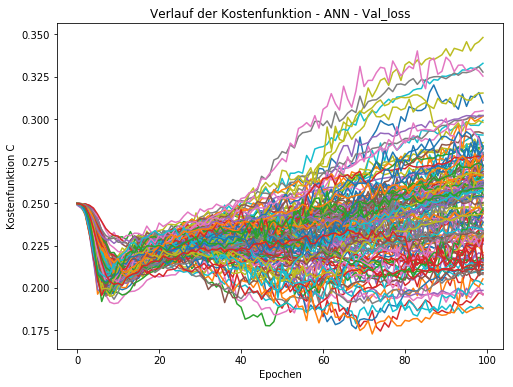

In [4]:
if os.path.exists(path):
    for (dirpath, dirnames, filenames) in os.walk(path):
        for filename in filenames:
            if filename[(len(filename)-3):len(filename)] == 'pkl':
                #print("file: ", filename)
                with open(path + filename, 'rb') as input:
                    ann_net = pickle.load(input)

                    plt.plot(ann_net['history_val_loss'])
else:
    print('FAIL')

plt.title('Verlauf der Kostenfunktion - ANN - Val_loss')
plt.ylabel('Kostenfunktion C')
plt.xlabel('Epochen')
figure = plt.gcf() # get current figure
figure.set_size_inches(8, 6)

pic_name=create_file_name()+'_bild_val_loss'
plt.savefig(path + pic_name + '.png')

plt.show()

In [5]:
def calc_mean(arr, start, stop):
    if start > stop:
        tmp = start
        start = stop
        stop = tmp
    sum = 0
    #print('laenge:', len(arr))
    j = 0
    for i in range(start, stop):
        sum = sum + arr[i]
        j = j + 1
    return (sum / j)


def calc_min(arr, start, stop):
    if start > stop:
        tmp = start
        start = stop
        stop = tmp
    min = 100.0
    j = 0
    for i in range(start, stop):
        if arr[i] < min:
            min = arr[i]
    return min

In [8]:
points=[]
min=100
units1_min=0
units2_min=2
if os.path.exists(path):
    for (dirpath, dirnames, filenames) in os.walk(path):
        for filename in filenames:
            if filename[(len(filename)-3):len(filename)] == 'pkl':
                #print("file: ", filename)
                with open(path + filename, 'rb') as input:
                    ann_net = pickle.load(input)
                    temp_mean=calc_mean(ann_net['history_val_loss'],15,100)
                    temp_min=calc_min(ann_net['history_val_loss'],15,100)
                    if temp_min<min:
                        min=temp_min
                        units1_min= ann_net['units1']
                        units2_min= ann_net['units2']
                    if temp_mean<0.24: #ausschneiden
                        pointx=ann_net['units1']
                        pointy=ann_net['units2']
                        pointz=temp_mean
                        pointsrow=[]
                        pointsrow.append(pointx)
                        pointsrow.append(pointy)
                        pointsrow.append(pointz)
                        points.append(pointsrow)
else:
    print('FAIL')

   
 
print('minimales Netz')
print(min)
print(units1_min)
print(units2_min)
print('--------------------')
    
points = np.array(points)
plt.scatter(points[:, 0], points[:, 1], c=points[:, 2]) #scatter = punktdiagramme
plt.title("Kostvergleich ab Epoche 15-100 abhängig der Neuronen der Layer")
plt.xlabel("Neuronen erster Layer")
plt.ylabel("Neuronen zweiter Layer")
cbar = plt.colorbar()
cbar.set_label("Kosten", labelpad=+2)
figure = plt.gcf()  # get current figure
figure.set_size_inches(8, 6) 
pic_name=create_file_name()+'_bild_Neuronenvergleich'
plt.savefig(path + pic_name + '.png') 
plt.show()

KeyError: 'units1'